<a href="https://colab.research.google.com/github/jgkorman/Python-Projects/blob/main/Time_Series_Analysis_Examining_NYC_Subway_Ridership.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DSTEP21 // Assignment #4**

assigned : **Oct 11, 2021**

DUE : **Oct 18, 2021 11:59pm**

## **Assessing Patterns and Variability in NYC Subway Ridership**

<img src="https://www.nydailynews.com/resizer/7RV4Q09wAlPocpkw39__PEHNCrE=/1200x0/center/middle/cloudfront-us-east-1.images.arcpublishing.com/tronc/DBIOLYQ3EZAP7O33M3FED2UIXM.jpg" width=300>

<img src="https://nypost.com/wp-content/uploads/sites/2/2021/06/new-york-subway-004.jpg?quality=80&strip=all" width=300>


---

***IMPORTANT NOTE FOR SUBMITTING THIS ASSIGNMENT***

Please create a new ***PRIVATE*** repository on GitHub called `dstep21_<UDusername>` and add me (my GitHub username is gdobler) as a member of the repo through the settings button on the repo's main page.  After clicking "Settings", click "Manage Access" on the left and then "Add People".  Add <u>only me</u> to this repository.  Your assignment should be submitted by "pushing" your notebook from your computer/laptop to this repo.

---

#### **PART 0 - WEEKLY VISUALIZATION**

As before, this is – and will continue to be – a *very* open-ended task with two objectives:

1. ***Find a data set on the web that relates to a policy problem***

2. ***Make a plot of some characteristics/features of that data using python on your own computer***

These "weekly visualizations" should be done without collaborating with other students, in a <u>separate notebook</u>, and should **include a link** to where I can find the data.  **A caption is also necessary** but it is *not* a requirement that the visualization show an obvious relationship (e.g., correlation or scaling) between the features of the data set.  

Lastly, these visualizations should be made **using Python/Jupyter running on your own machine** and not Colaboratory.  If you do not have access to your own computer on which you have permissions to install software for yourself, or if your machine does not have sufficient computational resources to load and analyze data, please let me know!

**To submit the visualization, the `.ipynb` Jupyter notebook that you create and write on your machine should be uploaded to your `dstep21/assignments/submissions/<username>/` folder.**

---

**Please list the names of the other students with whom you worked for this assignment (if none, put "None").**

None 

---

### **PART 1 - Background**

**<u>In your own words</u>, summarize (~300-500 words) the impact of the COVID-19 pandemic on subway ridership in NYC.**

The COVID 19 pandemic has had [deleterious](https://www.osc.state.ny.us/reports/osdc/impact-covid-19-pandemic-subway-ridership-new-york-city) impacts on ridership in the NYC subway system. As stated by the Office of the New York State Comptroller -- the emergence of the virus corresponded with a steep drop in subway usage. City wide, the commptroller's office notes -- that in April of 2020 -- ridership was a mere 8.3% of what it was in April 2019. Since that time -- riders have slowly begun to recommit to the subway system -- however -- ridership is still down overall as the 'work from home' phenemonon that the pandemic insinuated does not appear to be abating the least bit. Nonetheless, the 'work from home' phenomenon has not had equal impacts across groups on society. Ths, while the business class had the luxury to turn to telecommuting to protect themselves from the virus, others have not been afforded that luxury. Consequently, ridership as a percentage of pre-COVID levels has remained elevated in lower-income neighborhoods relative to wealthy ones. The New York Times report detailed below also speaks out against this grave injustice. 

In terms of the financial implications, a [New York Times Report ](https://www.nytimes.com/interactive/2021/03/08/climate/nyc-transit-covid.html) notes that the pandemic has thrown the largest public transit system in America into financial turmoil. The city must find a way to recoop membership -- especially if it is to acheive its plan of becoming carbon neutral by 2050. Thus -- the pandemic has not only impacted ridership which disproportionately affects low income communities -- but the pandemic has also caused ridership to plummit which has grave implications for creating a more green city by ridding carbon. This problem is further amplified by the fact that car travel is near pre-pandemic levels once again while subway ridership remains severely depressed.

There does appear to be evidence for some hope however as a [NYC Transit Report](https://new.mta.info/press-release/daily-subway-ridership-tops-two-million-first-time-beginning-of-covid-19-pandemic) notes that in April of 2021 nearly more than a year after the pandemic first started -- daily subway ridership had topped 2 million people. This speaks to the fact that we are getting back to atleast some semblance of a return to normalcy. Let us hope that we can continue on this path to normalcy for good as the COVID 19 pandemic and its resultant immpacts on NYC subway ridership has caused both financial and social pain to society at large. 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### **PART 2 - Accessing the Data**

<b>

Get access to the 2019 and 2020 subway turntile data with the following steps <u>using unix commands in Colaboratory</u>:

1. Download the data using the `wget` command (you'll need an `!` before it).  Here are the URLs for the [2019](https://tinyurl.com/ur3t33rt) and [2020](https://tinyurl.com/46d4354b) data.

2. The downloaded files will have odd names.  Rename them (using the `mv` command) to `mta_2019.zip` and `mta_2020.zip`.

3. Make two folders `mta_turnstiles_2019` and `mta_turnstiles_2020`.

4. Move each downloaded file into the appropriate folder that you just created.

5. For each folder, `cd` into the folder and then use the `unzip` command (you'll need an `!` before it) to unzip the files in the folders.

6. Finally, change your directory to be the virutal machine's home directory `/content`.

You should now have access to the files in `mta_turnstiles_2019/body.csv` and `mta_turnstiles_2020/body.csv`.

</b>

In [ ]:
pwd

'/content'

In [ ]:
cd drive/

/content/drive


In [ ]:
cd MyDrive/

/content/drive/MyDrive


In [ ]:
!wget https://tinyurl.com/ur3t33rt





--2021-10-17 03:13:57--  https://tinyurl.com/ur3t33rt
Resolving tinyurl.com (tinyurl.com)... 104.20.139.65, 172.67.1.225, 104.20.138.65, ...
Connecting to tinyurl.com (tinyurl.com)|104.20.139.65|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://drive.google.com/uc?export=download&id=15Jntk7xz_uELOjMd-EEMMdkFBRZnN4ha [following]
--2021-10-17 03:13:57--  https://drive.google.com/uc?export=download&id=15Jntk7xz_uELOjMd-EEMMdkFBRZnN4ha
Resolving drive.google.com (drive.google.com)... 173.194.197.139, 173.194.197.102, 173.194.197.113, ...
Connecting to drive.google.com (drive.google.com)|173.194.197.139|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-00-ac-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/kf5gd78dh5vvi64q3m5ko0fovg3l7kpj/1634440425000/06776162455182541625/*/15Jntk7xz_uELOjMd-EEMMdkFBRZnN4ha?e=download [following]
--2021-10-17 03:13:58--  https://do

In [ ]:
mv ur3t33rt mta_2019.zip

In [ ]:
ls

"10th Annual Grad Students' Forum Presentation_KormanJamesG.pdf"
'Colab Notebooks'/
'Copy of Copy of Research Funding Online.gdoc'
'Copy of local_law_84.csv'
'Copy of pluto_mn_ll84.csv'
'Copy of Research Funding Online.gdoc'
 CV_UD_2020_DECEMBER_2020.pdf
'D&I Soles UD Dept POSCIR'/
 DPI2017_basefile_Jan20181.0.csv
 DPI2017_basefile_Jan2018.csv
 DSTEP721/
 Final_Paper_Long_Paper_KormanJamesG.docx
'Groups for Final Project POSC 491.gdoc'
 Long_Paper_RScript.R
 mta_2019.zip
 mta_turnstiles_2019/
 mta_turnstiles_2020/
'PhD Long Paper'/
'Presentation_Selection of Cases & Barriers to Causal Inference_Korman_JamesG.pptx'
 temp_dstep21/
 Untitled0.ipynb


In [ ]:
!wget https://tinyurl.com/46d4354b



--2021-10-17 03:13:59--  https://tinyurl.com/46d4354b
Resolving tinyurl.com (tinyurl.com)... 104.20.139.65, 172.67.1.225, 104.20.138.65, ...
Connecting to tinyurl.com (tinyurl.com)|104.20.139.65|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://drive.google.com/uc?export=download&id=1Kud0tiMYDwdWj5Jbn2ObwFyHwDosSQ4o [following]
--2021-10-17 03:13:59--  https://drive.google.com/uc?export=download&id=1Kud0tiMYDwdWj5Jbn2ObwFyHwDosSQ4o
Resolving drive.google.com (drive.google.com)... 173.194.197.113, 173.194.197.100, 173.194.197.138, ...
Connecting to drive.google.com (drive.google.com)|173.194.197.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-00-ac-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/19j0jt9okme8ah7g9mc0ko40eqnupikg/1634440425000/06776162455182541625/*/1Kud0tiMYDwdWj5Jbn2ObwFyHwDosSQ4o?e=download [following]
--2021-10-17 03:14:01--  https://do

In [ ]:
mv 46d4354b mta_2020.zip

In [ ]:
ls /content

drive/  sample_data/


In [ ]:
ls 

"10th Annual Grad Students' Forum Presentation_KormanJamesG.pdf"
'Colab Notebooks'/
'Copy of Copy of Research Funding Online.gdoc'
'Copy of local_law_84.csv'
'Copy of pluto_mn_ll84.csv'
'Copy of Research Funding Online.gdoc'
 CV_UD_2020_DECEMBER_2020.pdf
'D&I Soles UD Dept POSCIR'/
 DPI2017_basefile_Jan20181.0.csv
 DPI2017_basefile_Jan2018.csv
 DSTEP721/
 Final_Paper_Long_Paper_KormanJamesG.docx
'Groups for Final Project POSC 491.gdoc'
 Long_Paper_RScript.R
 mta_2019.zip
 mta_2020.zip
 mta_turnstiles_2019/
 mta_turnstiles_2020/
'PhD Long Paper'/
'Presentation_Selection of Cases & Barriers to Causal Inference_Korman_JamesG.pptx'
 temp_dstep21/
 Untitled0.ipynb


In [ ]:
mkdir mta_turnstiles_2019

mkdir: cannot create directory ‘mta_turnstiles_2019’: File exists


In [ ]:
mkdir mta_turnstiles_2020

mkdir: cannot create directory ‘mta_turnstiles_2020’: File exists


In [ ]:
ls 

"10th Annual Grad Students' Forum Presentation_KormanJamesG.pdf"
'Colab Notebooks'/
'Copy of Copy of Research Funding Online.gdoc'
'Copy of local_law_84.csv'
'Copy of pluto_mn_ll84.csv'
'Copy of Research Funding Online.gdoc'
 CV_UD_2020_DECEMBER_2020.pdf
'D&I Soles UD Dept POSCIR'/
 DPI2017_basefile_Jan20181.0.csv
 DPI2017_basefile_Jan2018.csv
 DSTEP721/
 Final_Paper_Long_Paper_KormanJamesG.docx
'Groups for Final Project POSC 491.gdoc'
 Long_Paper_RScript.R
 mta_2019.zip
 mta_2020.zip
 mta_turnstiles_2019/
 mta_turnstiles_2020/
'PhD Long Paper'/
'Presentation_Selection of Cases & Barriers to Causal Inference_Korman_JamesG.pptx'
 temp_dstep21/
 Untitled0.ipynb


In [ ]:
mv mta_2019.zip mta_turnstiles_2019/

In [ ]:
mv mta_2020.zip mta_turnstiles_2020/

In [ ]:
pwd


'/content/drive/My Drive'

In [ ]:
cd /content/drive/My Drive/mta_turnstiles_2019/

/content/drive/My Drive/mta_turnstiles_2019


In [ ]:
!unzip mta_2019.zip

Archive:  mta_2019.zip
replace commit.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
cd /content/drive/My Drive/mta_turnstiles_2020/

/content/drive/My Drive/mta_turnstiles_2020


In [ ]:
pwd

'/content/drive/My Drive/mta_turnstiles_2020'

In [ ]:
!unzip mta_2020.zip

Archive:  mta_2020.zip
replace commit.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
cd /content

/content


In [ ]:
pwd

'/content'

### **PART 3 - Loading and Visualizing the Data**

**Load the 2019 and 2020 data into DataFrames called `mta19` and `mta20`.**

In [ ]:
fname = "/content/drive/MyDrive/mta_turnstiles_2019/body.csv"

In [ ]:
mta19 = pd.read_csv(fname, low_memory=False, parse_dates=["date"])

In [ ]:
mta19

,stop_name,daytime_routes,division,line,borough,structure,gtfs_longitude,gtfs_latitude,complex_id,date,entries,exits
0,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2019-01-01,5896.0,5319.0
1,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2019-01-02,14472.0,9702.0
2,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2019-01-03,15674.0,12234.0
3,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2019-01-04,15534.0,13489.0
4,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2019-01-05,7813.0,8937.0
...,...,...,...,...,...,...,...,...,...,...,...,...
159379,Journal Sq,NaN,PTH,NaN,NaN,NaN,-74.068632,40.730304,R552,2019-12-27,22208.0,21824.0
159380,Journal Sq,NaN,PTH,NaN,NaN,NaN,-74.068632,40.730304,R552,2019-12-28,17177.0,19700.0
159381,Journal Sq,NaN,PTH,NaN,NaN,NaN,-74.068632,40.730304,R552,2019-12-29,12084.0,16902.0
159382,Journal Sq,NaN,PTH,NaN,NaN,NaN,-74.068632,40.730304,R552,2019-12-30,21062.0,42026.0


In [ ]:
mta19.dtypes

stop_name                 object
daytime_routes            object
division                  object
line                      object
borough                   object
structure                 object
gtfs_longitude           float64
gtfs_latitude            float64
complex_id                object
date              datetime64[ns]
entries                  float64
exits                    float64
dtype: object

In [ ]:
mta19.isna().sum()

stop_name          126
daytime_routes    5595
division           126
line              5595
borough           5595
structure         5595
gtfs_longitude     126
gtfs_latitude      126
complex_id           0
date                 0
entries              2
exits                2
dtype: int64

In [ ]:
# -- convert NaNs to 0s
#mta19 = mta19.fillna(0.0)

In [ ]:
fname = "/content/drive/MyDrive/mta_turnstiles_2020/body.csv"

In [ ]:
mta20 = pd.read_csv(fname, low_memory=False, parse_dates=["date"])

In [ ]:
mta20

,stop_name,daytime_routes,division,line,borough,structure,gtfs_longitude,gtfs_latitude,complex_id,date,entries,exits
0,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-01,5812.0,6659.0
1,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-02,15506.0,14307.0
2,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-03,15959.0,14500.0
3,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-04,9265.0,9161.0
4,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-05,7191.0,7743.0
...,...,...,...,...,...,...,...,...,...,...,...,...
159528,Journal Sq,NaN,PTH,NaN,NaN,NaN,-74.068632,40.730304,R552,2020-12-21,9116.0,10446.0
159529,Journal Sq,NaN,PTH,NaN,NaN,NaN,-74.068632,40.730304,R552,2020-12-22,9225.0,10445.0
159530,Journal Sq,NaN,PTH,NaN,NaN,NaN,-74.068632,40.730304,R552,2020-12-23,9361.0,8109.0
159531,Journal Sq,NaN,PTH,NaN,NaN,NaN,-74.068632,40.730304,R552,2020-12-24,7652.0,6975.0


In [ ]:
mta20.isna().sum()

stop_name          116
daytime_routes    6236
division           116
line              6236
borough           6236
structure         6236
gtfs_longitude     116
gtfs_latitude      116
complex_id           0
date                 0
entries             23
exits               23
dtype: int64

In [ ]:
mta20.dtypes

stop_name                 object
daytime_routes            object
division                  object
line                      object
borough                   object
structure                 object
gtfs_longitude           float64
gtfs_latitude            float64
complex_id                object
date              datetime64[ns]
entries                  float64
exits                    float64
dtype: object

**Remove rows for which the `"borough"` is NaN.**

In [ ]:
mta19 = mta19[mta19['borough'].notna()]

In [ ]:
mta19['borough'].unique()

array(['Q', 'Bk', 'M', 'Bx', 'SI'], dtype=object)

In [ ]:
mta19

,stop_name,daytime_routes,division,line,borough,structure,gtfs_longitude,gtfs_latitude,complex_id,date,entries,exits
0,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2019-01-01,5896.0,5319.0
1,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2019-01-02,14472.0,9702.0
2,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2019-01-03,15674.0,12234.0
3,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2019-01-04,15534.0,13489.0
4,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2019-01-05,7813.0,8937.0
...,...,...,...,...,...,...,...,...,...,...,...,...
153784,Lorimer St,J M,BMT,Jamaica,Bk,Elevated,-73.947408,40.703869,99,2019-12-27,4047.0,3219.0
153785,Lorimer St,J M,BMT,Jamaica,Bk,Elevated,-73.947408,40.703869,99,2019-12-28,3703.0,3170.0
153786,Lorimer St,J M,BMT,Jamaica,Bk,Elevated,-73.947408,40.703869,99,2019-12-29,3520.0,3015.0
153787,Lorimer St,J M,BMT,Jamaica,Bk,Elevated,-73.947408,40.703869,99,2019-12-30,4367.0,3338.0


In [ ]:
mta20['borough'].unique()

array(['Q', 'M', 'Bk', 'Bx', 'SI', nan], dtype=object)

In [ ]:
mta20 = mta20[mta20['borough'].notna()]

In [ ]:
mta20['borough'].unique()

array(['Q', 'M', 'Bk', 'Bx', 'SI'], dtype=object)

In [ ]:
mta20


,stop_name,daytime_routes,division,line,borough,structure,gtfs_longitude,gtfs_latitude,complex_id,date,entries,exits
0,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-01,5812.0,6659.0
1,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-02,15506.0,14307.0
2,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-03,15959.0,14500.0
3,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-04,9265.0,9161.0
4,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-05,7191.0,7743.0
...,...,...,...,...,...,...,...,...,...,...,...,...
153292,Lorimer St,J M,BMT,Jamaica,Bk,Elevated,-73.947408,40.703869,99,2020-12-21,1771.0,1842.0
153293,Lorimer St,J M,BMT,Jamaica,Bk,Elevated,-73.947408,40.703869,99,2020-12-22,1775.0,1783.0
153294,Lorimer St,J M,BMT,Jamaica,Bk,Elevated,-73.947408,40.703869,99,2020-12-23,1767.0,1860.0
153295,Lorimer St,J M,BMT,Jamaica,Bk,Elevated,-73.947408,40.703869,99,2020-12-24,1465.0,1545.0


**Plot daily time series (entries and exists separately) for 2019 and 2020, summing across all stations.**

In [ ]:
mta19stations = mta19.groupby('date').sum().reset_index()

In [ ]:
mta19stations

,date,gtfs_longitude,gtfs_latitude,entries,exits
0,2019-01-01,-30977.889661,17065.474817,2326253.0,1980678.0
1,2019-01-02,-30904.128308,17024.874751,4874104.0,3721290.0
2,2019-01-03,-30904.128308,17024.874751,5313423.0,4062817.0
3,2019-01-04,-30830.174153,16984.287855,5286626.0,4056297.0
4,2019-01-05,-30977.889661,17065.474817,2866267.0,2397058.0
...,...,...,...,...,...
360,2019-12-27,-31273.650628,17228.566360,4300263.0,3538811.0
361,2019-12-28,-31273.650628,17228.566360,3217603.0,2772320.0
362,2019-12-29,-31273.650628,17228.566360,2713548.0,2380748.0
363,2019-12-30,-31273.650628,17228.566360,4197229.0,3454194.0


In [ ]:
mta20stations = mta20.groupby('date').sum().reset_index()

In [ ]:
mta20stations

,date,gtfs_longitude,gtfs_latitude,entries,exits
0,2020-01-01,-31495.574675,17350.851173,2308737.0,2054459.0
1,2020-01-02,-31495.574675,17350.851173,4999970.0,4028914.0
2,2020-01-03,-31421.611693,17310.200646,4964330.0,4002503.0
3,2020-01-04,-31421.562956,17310.216109,2808309.0,2414338.0
4,2020-01-05,-31421.562956,17310.216109,2284310.0,1991875.0
...,...,...,...,...,...
355,2020-12-21,-31421.641079,17310.001668,1576155.0,1610311.0
356,2020-12-22,-31421.641079,17310.001668,1613502.0,1655369.0
357,2020-12-23,-31421.641079,17310.001668,1622326.0,1671912.0
358,2020-12-24,-31421.641079,17310.001668,1214913.0,1293276.0


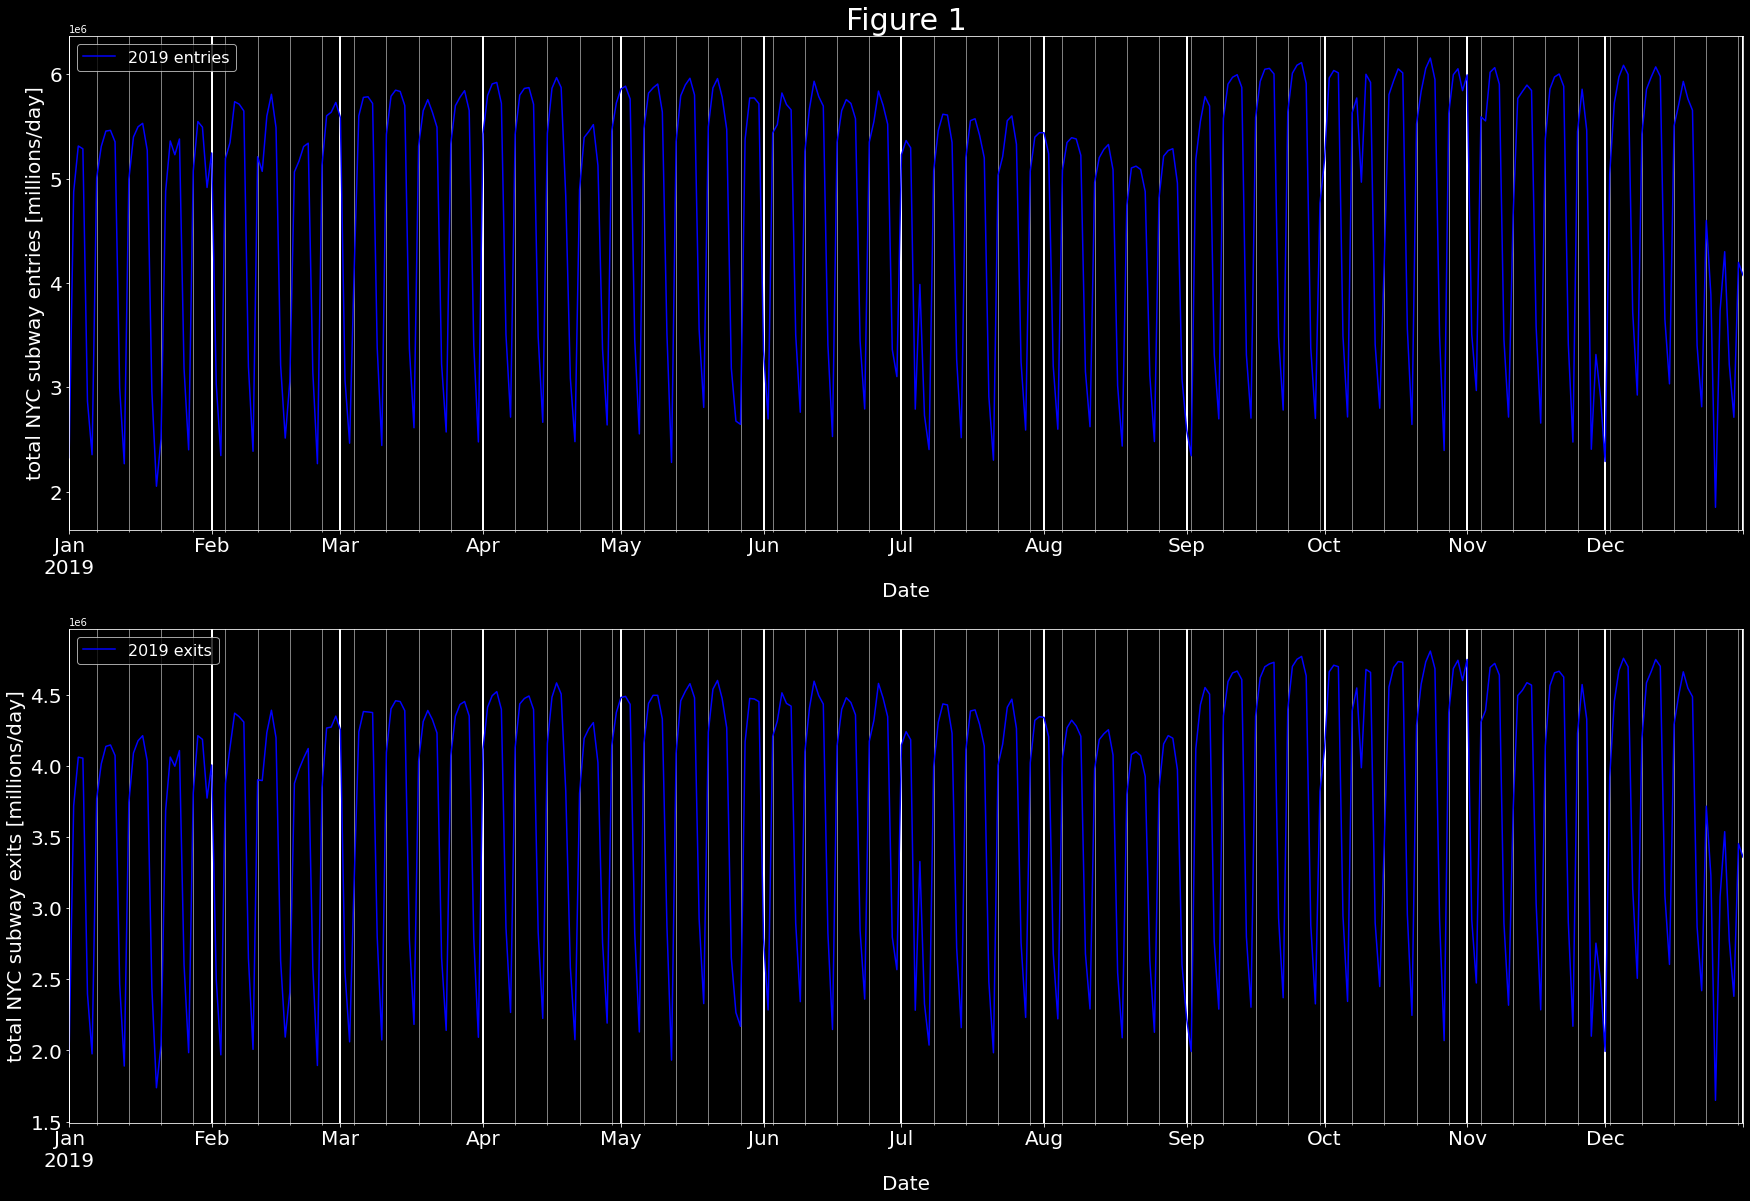

In [ ]:
# For 2019 first 

plt.style.use('dark_background')

fig, ax = plt.subplots(2, 1, figsize=(30, 20))
mta19stations.plot(y="entries", x='date', color="blue", label="2019 entries", fontsize=20, ax=ax[0])
ax[0].set_title("Figure 1", fontsize=30)
ax[0].grid(axis="x", which="major", lw=2)
ax[0].grid(axis="x", which="minor", lw=0.5)
ax[0].set_xlabel("Date", fontsize=20)
ax[0].set_ylabel("total NYC subway entries [millions/day]", fontsize=20)
ax[0].legend(prop={"size":16})



mta19stations.plot(y='exits', x='date', ax=ax[1], color='blue', label="2019 exits", fontsize=20)
ax[1].grid(axis="x", which="major", lw=2)
ax[1].grid(axis="x", which="minor", lw=0.5)
ax[1].set_xlabel("Date", fontsize=20)
ax[1].set_ylabel("total NYC subway exits [millions/day]", fontsize=20)
ax[1].legend(prop={"size":16})



fig.show()



**Figure 1** above plots the daily time series for total NYC subway ridership for the year 2019. Overall, there appears to be periodicity in the data where ridership drops off on the weekends as can be witnessed on all the minor axes in between each month across the x-axis. The series appears stationary for the most part. 

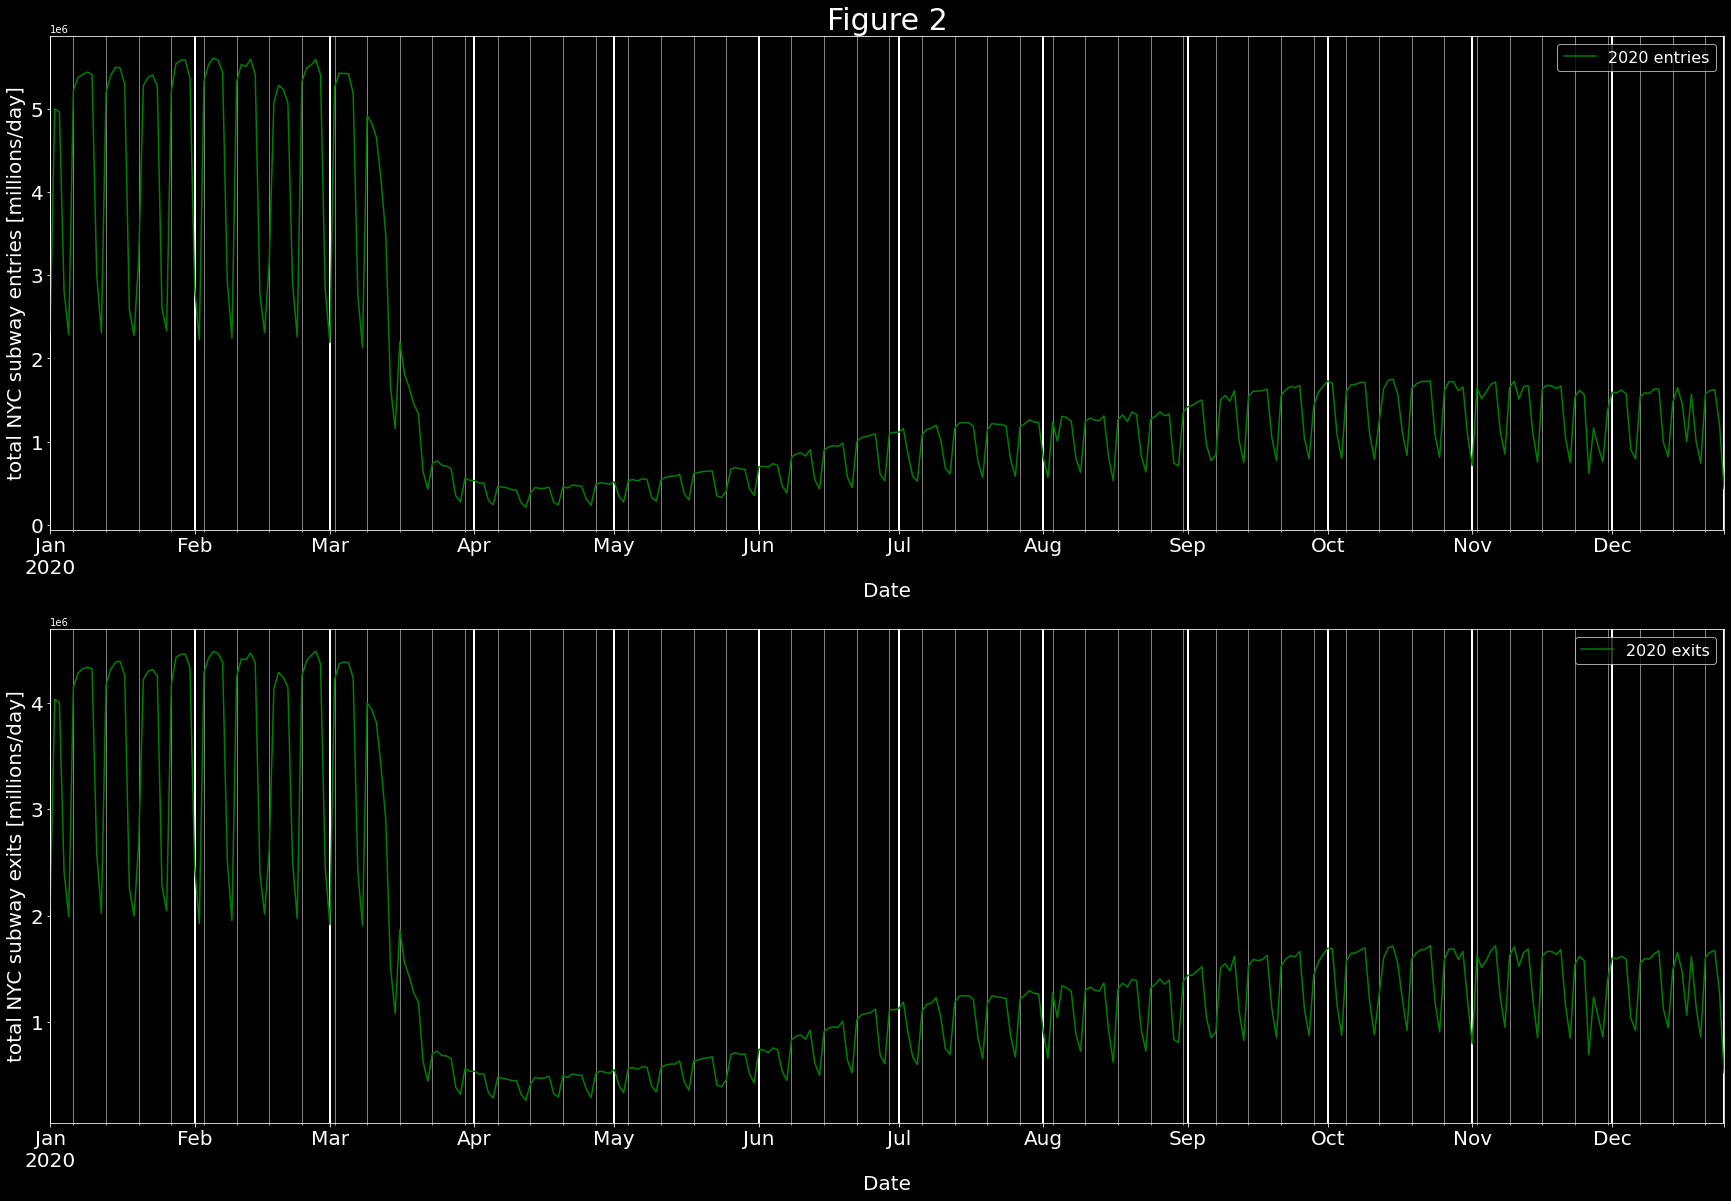

In [ ]:
# For 2020 entries and exits 

plt.style.use('dark_background')

fig, ax = plt.subplots(2, 1, figsize=(30, 20))
mta20stations.plot(y="entries", x='date', color="green", label="2020 entries", fontsize=20, ax=ax[0])
ax[0].set_title("Figure 2", fontsize=30)
ax[0].grid(axis="x", which="major", lw=2)
ax[0].grid(axis="x", which="minor", lw=0.5)
ax[0].set_xlabel("Date", fontsize=20)
ax[0].set_ylabel("total NYC subway entries [millions/day]", fontsize=20)
ax[0].legend(prop={"size":16})



mta20stations.plot(y='exits', x='date', ax=ax[1], color='green', label="2020 exits", fontsize=20)
ax[1].grid(axis="x", which="major", lw=2)
ax[1].grid(axis="x", which="minor", lw=0.5)
ax[1].set_xlabel("Date", fontsize=20)
ax[1].set_ylabel("total NYC subway exits [millions/day]", fontsize=20)
ax[1].legend(prop={"size":16})


fig.show()

**Figure 2** above plots the daily time series for total NYC subway ridership for the year 2020. We see that the pandemic is heavily imprinted on this time series for both entries and exits on each plot whereas once March of 2020 sets in (when the pandemic really took hold) we witness a steep drop in both entries and exits. The series does show however that ridership slowly begins to pick up as the year 2020 progresses but is still nowhere near it s pre March 2020 levels. 

**Plot the daily time series (entries and exists) for Manhattan only and also summed across all non-Manhattan boroughs (aka, the "outer boroughs").**

In [ ]:
mta19

,stop_name,daytime_routes,division,line,borough,structure,gtfs_longitude,gtfs_latitude,complex_id,date,entries,exits
0,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2019-01-01,5896.0,5319.0
1,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2019-01-02,14472.0,9702.0
2,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2019-01-03,15674.0,12234.0
3,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2019-01-04,15534.0,13489.0
4,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2019-01-05,7813.0,8937.0
...,...,...,...,...,...,...,...,...,...,...,...,...
153784,Lorimer St,J M,BMT,Jamaica,Bk,Elevated,-73.947408,40.703869,99,2019-12-27,4047.0,3219.0
153785,Lorimer St,J M,BMT,Jamaica,Bk,Elevated,-73.947408,40.703869,99,2019-12-28,3703.0,3170.0
153786,Lorimer St,J M,BMT,Jamaica,Bk,Elevated,-73.947408,40.703869,99,2019-12-29,3520.0,3015.0
153787,Lorimer St,J M,BMT,Jamaica,Bk,Elevated,-73.947408,40.703869,99,2019-12-30,4367.0,3338.0


In [ ]:
mta19manhattan= mta19['borough'].str.contains('M')

In [ ]:
mta19manhattan = mta19[mta19manhattan]

In [ ]:
mta19manhattan['borough'].unique()

array(['M'], dtype=object)

In [ ]:
mta19manhattan

,stop_name,daytime_routes,division,line,borough,structure,gtfs_longitude,gtfs_latitude,complex_id,date,entries,exits
1095,Bowery,J Z,BMT,Jamaica,M,Subway,-73.993915,40.720280,103,2019-01-01,2555.0,3157.0
1096,Bowery,J Z,BMT,Jamaica,M,Subway,-73.993915,40.720280,103,2019-01-02,3089.0,3852.0
1097,Bowery,J Z,BMT,Jamaica,M,Subway,-73.993915,40.720280,103,2019-01-03,3444.0,3888.0
1098,Bowery,J Z,BMT,Jamaica,M,Subway,-73.993915,40.720280,103,2019-01-04,3708.0,4230.0
1099,Bowery,J Z,BMT,Jamaica,M,Subway,-73.993915,40.720280,103,2019-01-05,3311.0,4031.0
...,...,...,...,...,...,...,...,...,...,...,...,...
150502,57 St - 7 Av,N Q R W,BMT,Broadway - Brighton,M,Subway,-73.980658,40.764664,9,2019-12-27,26052.0,18644.0
150503,57 St - 7 Av,N Q R W,BMT,Broadway - Brighton,M,Subway,-73.980658,40.764664,9,2019-12-28,22085.0,13708.0
150504,57 St - 7 Av,N Q R W,BMT,Broadway - Brighton,M,Subway,-73.980658,40.764664,9,2019-12-29,18687.0,11920.0
150505,57 St - 7 Av,N Q R W,BMT,Broadway - Brighton,M,Subway,-73.980658,40.764664,9,2019-12-30,25703.0,19184.0


In [ ]:
mta19outer = mta19['borough'].str.contains('M')

In [ ]:
mta19outer.unique()

array([False,  True])

In [ ]:
mta19outer = mta19[~mta19outer]

In [ ]:
mta19outer

,stop_name,daytime_routes,division,line,borough,structure,gtfs_longitude,gtfs_latitude,complex_id,date,entries,exits
0,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2019-01-01,5896.0,5319.0
1,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2019-01-02,14472.0,9702.0
2,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2019-01-03,15674.0,12234.0
3,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2019-01-04,15534.0,13489.0
4,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2019-01-05,7813.0,8937.0
...,...,...,...,...,...,...,...,...,...,...,...,...
153784,Lorimer St,J M,BMT,Jamaica,Bk,Elevated,-73.947408,40.703869,99,2019-12-27,4047.0,3219.0
153785,Lorimer St,J M,BMT,Jamaica,Bk,Elevated,-73.947408,40.703869,99,2019-12-28,3703.0,3170.0
153786,Lorimer St,J M,BMT,Jamaica,Bk,Elevated,-73.947408,40.703869,99,2019-12-29,3520.0,3015.0
153787,Lorimer St,J M,BMT,Jamaica,Bk,Elevated,-73.947408,40.703869,99,2019-12-30,4367.0,3338.0


In [ ]:
mta19manhattan

,stop_name,daytime_routes,division,line,borough,structure,gtfs_longitude,gtfs_latitude,complex_id,date,entries,exits
1095,Bowery,J Z,BMT,Jamaica,M,Subway,-73.993915,40.720280,103,2019-01-01,2555.0,3157.0
1096,Bowery,J Z,BMT,Jamaica,M,Subway,-73.993915,40.720280,103,2019-01-02,3089.0,3852.0
1097,Bowery,J Z,BMT,Jamaica,M,Subway,-73.993915,40.720280,103,2019-01-03,3444.0,3888.0
1098,Bowery,J Z,BMT,Jamaica,M,Subway,-73.993915,40.720280,103,2019-01-04,3708.0,4230.0
1099,Bowery,J Z,BMT,Jamaica,M,Subway,-73.993915,40.720280,103,2019-01-05,3311.0,4031.0
...,...,...,...,...,...,...,...,...,...,...,...,...
150502,57 St - 7 Av,N Q R W,BMT,Broadway - Brighton,M,Subway,-73.980658,40.764664,9,2019-12-27,26052.0,18644.0
150503,57 St - 7 Av,N Q R W,BMT,Broadway - Brighton,M,Subway,-73.980658,40.764664,9,2019-12-28,22085.0,13708.0
150504,57 St - 7 Av,N Q R W,BMT,Broadway - Brighton,M,Subway,-73.980658,40.764664,9,2019-12-29,18687.0,11920.0
150505,57 St - 7 Av,N Q R W,BMT,Broadway - Brighton,M,Subway,-73.980658,40.764664,9,2019-12-30,25703.0,19184.0


In [ ]:
mta19manhattan = mta19manhattan.groupby("date").sum().reset_index()

In [ ]:
mta19manhattan

,date,gtfs_longitude,gtfs_latitude,entries,exits
0,2019-01-01,-8728.840404,4811.001498,1299404.0,1164132.0
1,2019-01-02,-8728.840404,4811.001498,2671293.0,2293715.0
2,2019-01-03,-8728.840404,4811.001498,2956724.0,2472380.0
3,2019-01-04,-8728.840404,4811.001498,2941568.0,2457615.0
4,2019-01-05,-8728.840404,4811.001498,1588690.0,1344412.0
...,...,...,...,...,...
360,2019-12-27,-8802.824668,4851.744568,2372557.0,2133669.0
361,2019-12-28,-8802.824668,4851.744568,1836732.0,1659125.0
362,2019-12-29,-8802.824668,4851.744568,1577451.0,1427173.0
363,2019-12-30,-8802.824668,4851.744568,2355944.0,2146327.0


In [ ]:
mta19outer = mta19outer.groupby('date').sum().reset_index()

In [ ]:
mta19outer

,date,gtfs_longitude,gtfs_latitude,entries,exits
0,2019-01-01,-22249.049257,12254.473319,1026849.0,816546.0
1,2019-01-02,-22175.287904,12213.873253,2202811.0,1427575.0
2,2019-01-03,-22175.287904,12213.873253,2356699.0,1590437.0
3,2019-01-04,-22101.333749,12173.286357,2345058.0,1598682.0
4,2019-01-05,-22249.049257,12254.473319,1277577.0,1052646.0
...,...,...,...,...,...
360,2019-12-27,-22470.825960,12376.821792,1927706.0,1405142.0
361,2019-12-28,-22470.825960,12376.821792,1380871.0,1113195.0
362,2019-12-29,-22470.825960,12376.821792,1136097.0,953575.0
363,2019-12-30,-22470.825960,12376.821792,1841285.0,1307867.0


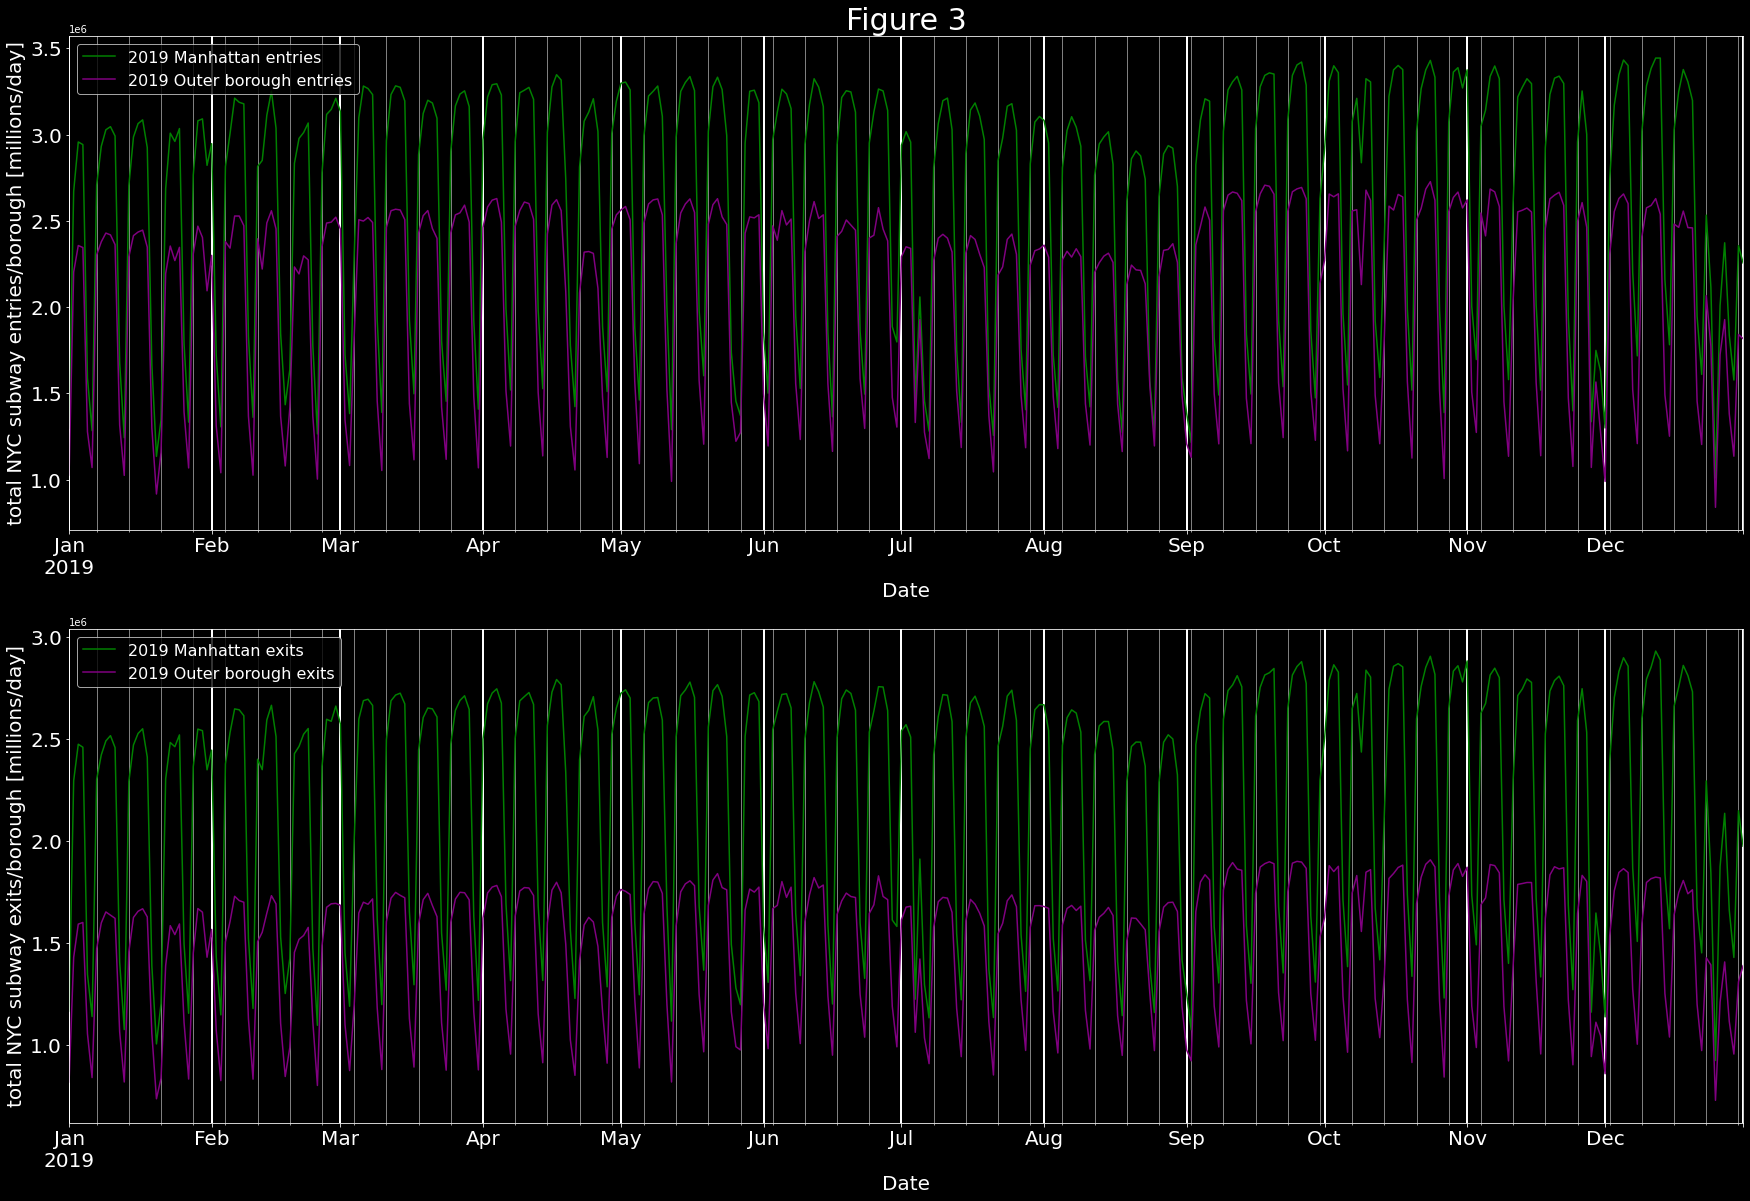

In [ ]:
plt.style.use('dark_background')


fig, ax = plt.subplots(2, 1, figsize=(30, 20))
mta19manhattan.plot(y="entries", x='date', color="green", label="2019 Manhattan entries", fontsize=20, ax=ax[0])
mta19outer.plot(y='entries', x='date', color='purple', label="2019 Outer borough entries", fontsize=20, ax=ax[0])
ax[0].set_title("Figure 3", fontsize=30)
ax[0].grid(axis="x", which="major", lw=2)
ax[0].grid(axis="x", which="minor", lw=0.5)
ax[0].set_xlabel("Date", fontsize=20)
ax[0].set_ylabel("total NYC subway entries/borough [millions/day]", fontsize=20)
ax[0].legend(prop={"size":16})



mta19manhattan.plot(y='exits', x='date', ax=ax[1], color='green', label="2019 Manhattan exits", fontsize=20)
mta19outer.plot(y='exits', x='date', color='purple', label="2019 Outer borough exits", fontsize=20, ax=ax[1])
ax[1].grid(axis="x", which="major", lw=2)
ax[1].grid(axis="x", which="minor", lw=0.5)
ax[1].set_xlabel("Date", fontsize=20)
ax[1].set_ylabel("total NYC subway exits/borough [millions/day]", fontsize=20)
ax[1].legend(prop={"size":16})




**Figure 3** plots the total daily entries and exits for NYC subway ridership for the Manhattan borough as shown via the green data and the outer boroughs (all boroughs except manhattan) as shown via the purple data for the year 2019. Overall, Manhattan in and of itself consistently registers more entries and exits for ridership than the 4 other boroughs combined. 

In [ ]:
mta20manhattan= mta20['borough'].str.contains('M')

In [ ]:
mta20manhattan = mta20[mta20manhattan]

In [ ]:
mta20manhattan['borough'].unique()

array(['M'], dtype=object)

In [ ]:
mta20manhattan

,stop_name,daytime_routes,division,line,borough,structure,gtfs_longitude,gtfs_latitude,complex_id,date,entries,exits
360,49 St,N R W,BMT,Broadway - Brighton,M,Subway,-73.984139,40.759901,10,2020-01-01,14843.0,11987.0
361,49 St,N R W,BMT,Broadway - Brighton,M,Subway,-73.984139,40.759901,10,2020-01-02,24800.0,19616.0
362,49 St,N R W,BMT,Broadway - Brighton,M,Subway,-73.984139,40.759901,10,2020-01-03,22581.0,18692.0
363,49 St,N R W,BMT,Broadway - Brighton,M,Subway,-73.984139,40.759901,10,2020-01-04,15887.0,13536.0
364,49 St,N R W,BMT,Broadway - Brighton,M,Subway,-73.984139,40.759901,10,2020-01-05,12820.0,11475.0
...,...,...,...,...,...,...,...,...,...,...,...,...
150056,57 St - 7 Av,N Q R W,BMT,Broadway - Brighton,M,Subway,-73.980658,40.764664,9,2020-12-21,6395.0,5817.0
150057,57 St - 7 Av,N Q R W,BMT,Broadway - Brighton,M,Subway,-73.980658,40.764664,9,2020-12-22,6579.0,6180.0
150058,57 St - 7 Av,N Q R W,BMT,Broadway - Brighton,M,Subway,-73.980658,40.764664,9,2020-12-23,6734.0,6283.0
150059,57 St - 7 Av,N Q R W,BMT,Broadway - Brighton,M,Subway,-73.980658,40.764664,9,2020-12-24,4461.0,4255.0


In [ ]:
mta20outer = mta20['borough'].str.contains('M')

In [ ]:
mta20outer.unique()

array([False,  True])

In [ ]:
mta20outer = mta20[~mta20outer]

In [ ]:
mta20outer['borough'].unique()

array(['Q', 'Bk', 'Bx', 'SI'], dtype=object)

In [ ]:
mta20outer

,stop_name,daytime_routes,division,line,borough,structure,gtfs_longitude,gtfs_latitude,complex_id,date,entries,exits
0,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-01,5812.0,6659.0
1,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-02,15506.0,14307.0
2,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-03,15959.0,14500.0
3,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-04,9265.0,9161.0
4,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-05,7191.0,7743.0
...,...,...,...,...,...,...,...,...,...,...,...,...
153292,Lorimer St,J M,BMT,Jamaica,Bk,Elevated,-73.947408,40.703869,99,2020-12-21,1771.0,1842.0
153293,Lorimer St,J M,BMT,Jamaica,Bk,Elevated,-73.947408,40.703869,99,2020-12-22,1775.0,1783.0
153294,Lorimer St,J M,BMT,Jamaica,Bk,Elevated,-73.947408,40.703869,99,2020-12-23,1767.0,1860.0
153295,Lorimer St,J M,BMT,Jamaica,Bk,Elevated,-73.947408,40.703869,99,2020-12-24,1465.0,1545.0


In [ ]:
mta20manhattan = mta20manhattan.groupby("date").sum().reset_index()

In [ ]:
mta20outer = mta20outer.groupby("date").sum().reset_index()

In [ ]:
mta20manhattan

,date,gtfs_longitude,gtfs_latitude,entries,exits
0,2020-01-01,-8950.821923,4933.211623,1327739.0,1210800.0
1,2020-01-02,-8950.821923,4933.211623,2782450.0,2444211.0
2,2020-01-03,-8950.821923,4933.211623,2741511.0,2421822.0
3,2020-01-04,-8950.821923,4933.211623,1520936.0,1401254.0
4,2020-01-05,-8950.821923,4933.211623,1235342.0,1134824.0
...,...,...,...,...,...
355,2020-12-21,-8876.888327,4892.362118,692629.0,785495.0
356,2020-12-22,-8876.888327,4892.362118,712372.0,811127.0
357,2020-12-23,-8876.888327,4892.362118,712890.0,823330.0
358,2020-12-24,-8876.888327,4892.362118,506803.0,605269.0


In [ ]:
mta20outer

,date,gtfs_longitude,gtfs_latitude,entries,exits
0,2020-01-01,-22544.752752,12417.639550,980998.0,843659.0
1,2020-01-02,-22544.752752,12417.639550,2217520.0,1584703.0
2,2020-01-03,-22470.789770,12376.989023,2222819.0,1580681.0
3,2020-01-04,-22470.741033,12377.004486,1287373.0,1013084.0
4,2020-01-05,-22470.741033,12377.004486,1048968.0,857051.0
...,...,...,...,...,...
355,2020-12-21,-22544.752752,12417.639550,883526.0,824816.0
356,2020-12-22,-22544.752752,12417.639550,901130.0,844242.0
357,2020-12-23,-22544.752752,12417.639550,909436.0,848582.0
358,2020-12-24,-22544.752752,12417.639550,708110.0,688007.0


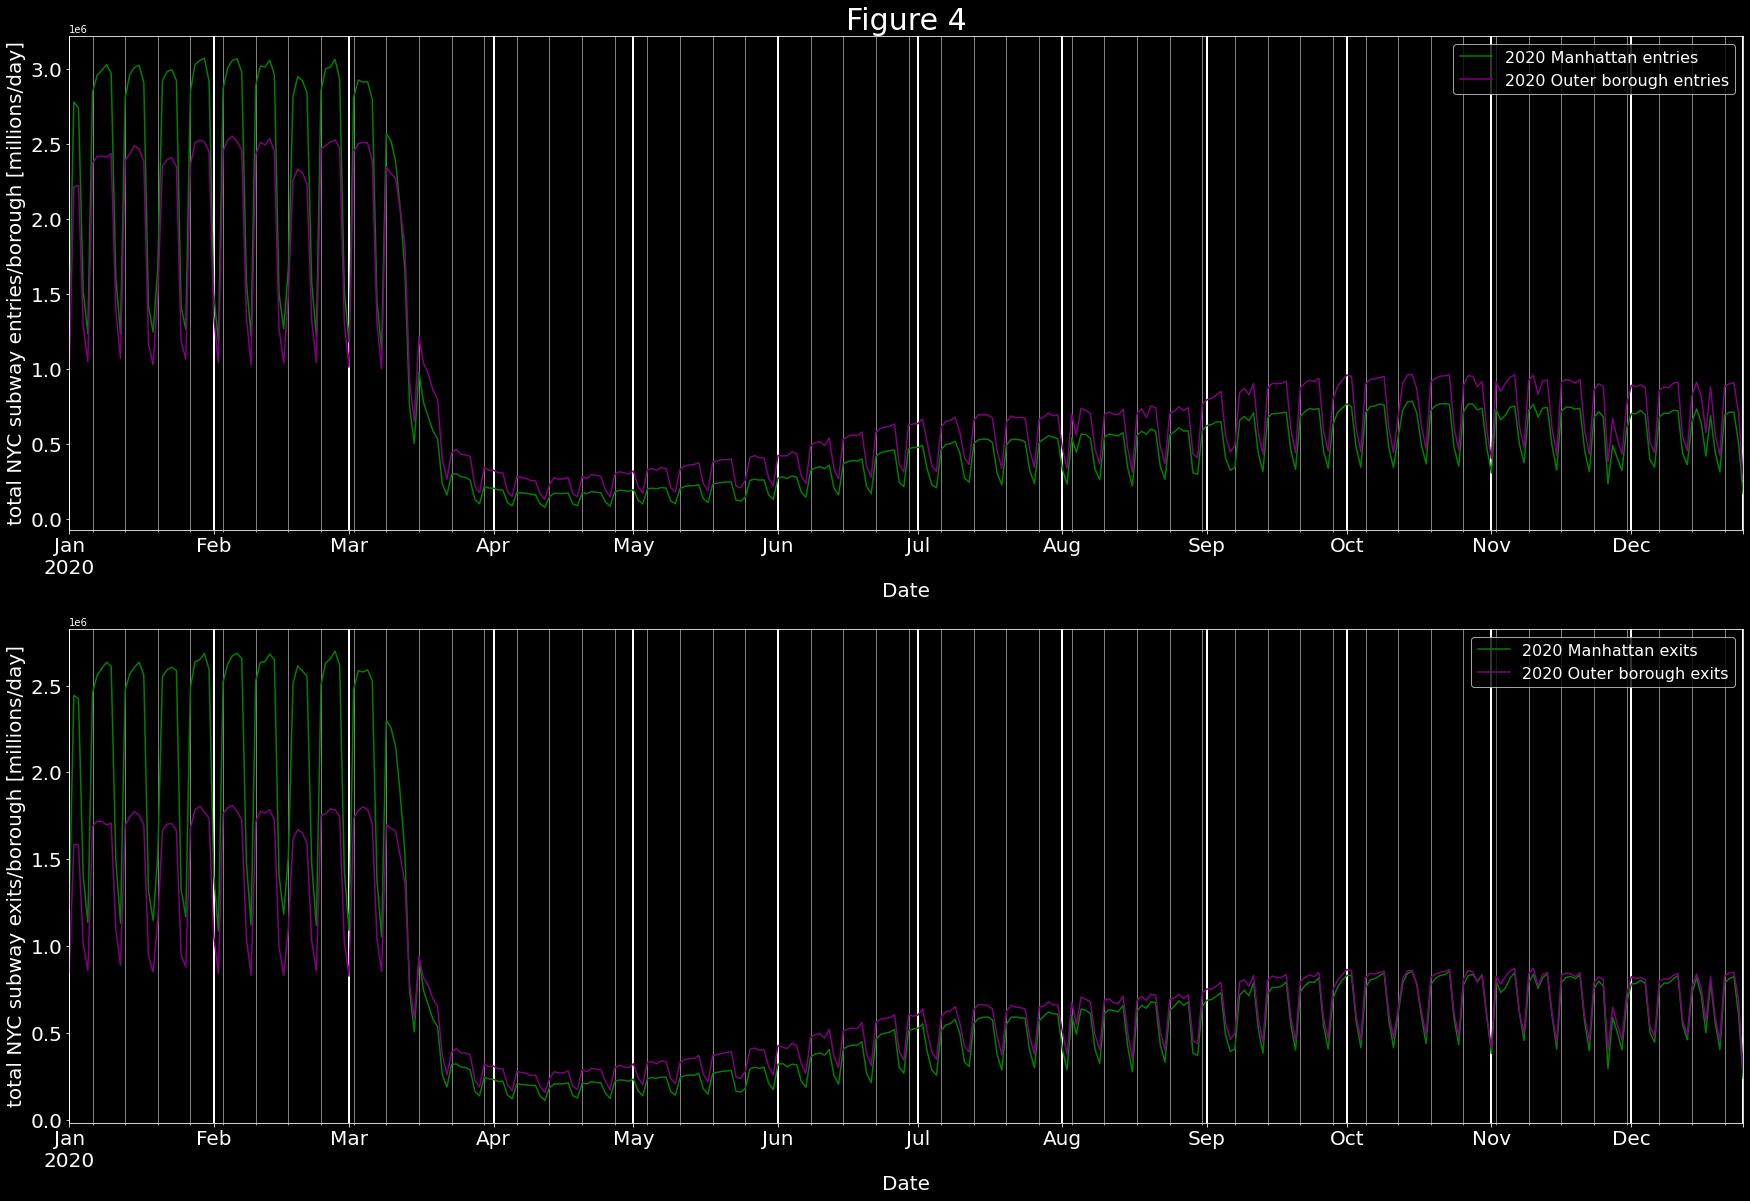

In [ ]:
plt.style.use('dark_background')


fig, ax = plt.subplots(2, 1, figsize=(30, 20))
mta20manhattan.plot(y="entries", x='date', color="green", label="2020 Manhattan entries", fontsize=20, ax=ax[0])
mta20outer.plot(y='entries', x='date', color='purple', label="2020 Outer borough entries", fontsize=20, ax=ax[0])
ax[0].set_title("Figure 4", fontsize=30)
ax[0].grid(axis="x", which="major", lw=2)
ax[0].grid(axis="x", which="minor", lw=0.5)
ax[0].set_xlabel("Date", fontsize=20)
ax[0].set_ylabel("total NYC subway entries/borough [millions/day]", fontsize=20)
ax[0].legend(prop={"size":16})


mta20manhattan.plot(y='exits', x='date', ax=ax[1], color='green', label="2020 Manhattan exits", fontsize=20)
mta20outer.plot(y='exits', x='date', color='purple', label="2020 Outer borough exits", fontsize=20, ax=ax[1])
ax[1].grid(axis="x", which="major", lw=2)
ax[1].grid(axis="x", which="minor", lw=0.5)
ax[1].set_xlabel("Date", fontsize=20)
ax[1].set_ylabel("total NYC subway exits/borough [millions/day]", fontsize=20)
ax[1].legend(prop={"size":16})

**Figure 4** plots the total daily NYC subway ridership entries and exits for the borough of Manhattan shown in green and all boroughs != Manhattan ("the outer boroughs") for the year 2020. Interestingly enough, figure 4 maintains the same trends as figure 3 (more overall ridership coming out of the Manhattan borough) up until March 2020 when the pandemic hit. Starting from March 2020 onwards in Figure 4 -- we see now not only a significant drop in ridership overall between all boroughs (manhattan or not) but for those boroughs that are not 'Manhattan' -- there is now increased ridership (more ridership coming from non-Manhattan boroughs relative to the Manhattan borough. This speaks to the fact that the pandemic had influenced NYC ridership disproportionately on lower income folks (who often reside in the outer boroughs) who weren't afforded the work from home luxuries that the majority business class of Manhattan had. 

### **PART 4 - Time Series Analysis**

**Which day of the week has the least ridership (entries) in the whole city in 2019?**

In [ ]:
mta19stations

,date,gtfs_longitude,gtfs_latitude,entries,exits
0,2019-01-01,-30977.889661,17065.474817,2326253.0,1980678.0
1,2019-01-02,-30904.128308,17024.874751,4874104.0,3721290.0
2,2019-01-03,-30904.128308,17024.874751,5313423.0,4062817.0
3,2019-01-04,-30830.174153,16984.287855,5286626.0,4056297.0
4,2019-01-05,-30977.889661,17065.474817,2866267.0,2397058.0
...,...,...,...,...,...
360,2019-12-27,-31273.650628,17228.566360,4300263.0,3538811.0
361,2019-12-28,-31273.650628,17228.566360,3217603.0,2772320.0
362,2019-12-29,-31273.650628,17228.566360,2713548.0,2380748.0
363,2019-12-30,-31273.650628,17228.566360,4197229.0,3454194.0


In [ ]:
#import datetime 
#date=str(input('01 01 2019'))
#day_name= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
#day = datetime.datetime.strptime(date, '%d %m %Y').weekday()
#print(day_name[day]) 

In [ ]:
day = ['T', 'W', "TR", "F", "S", "SU", "M"]
day = day * 52 

In [ ]:
day

['T',
 'W',
 'TR',
 'F',
 'S',
 'SU',
 'M',
 'T',
 'W',
 'TR',
 'F',
 'S',
 'SU',
 'M',
 'T',
 'W',
 'TR',
 'F',
 'S',
 'SU',
 'M',
 'T',
 'W',
 'TR',
 'F',
 'S',
 'SU',
 'M',
 'T',
 'W',
 'TR',
 'F',
 'S',
 'SU',
 'M',
 'T',
 'W',
 'TR',
 'F',
 'S',
 'SU',
 'M',
 'T',
 'W',
 'TR',
 'F',
 'S',
 'SU',
 'M',
 'T',
 'W',
 'TR',
 'F',
 'S',
 'SU',
 'M',
 'T',
 'W',
 'TR',
 'F',
 'S',
 'SU',
 'M',
 'T',
 'W',
 'TR',
 'F',
 'S',
 'SU',
 'M',
 'T',
 'W',
 'TR',
 'F',
 'S',
 'SU',
 'M',
 'T',
 'W',
 'TR',
 'F',
 'S',
 'SU',
 'M',
 'T',
 'W',
 'TR',
 'F',
 'S',
 'SU',
 'M',
 'T',
 'W',
 'TR',
 'F',
 'S',
 'SU',
 'M',
 'T',
 'W',
 'TR',
 'F',
 'S',
 'SU',
 'M',
 'T',
 'W',
 'TR',
 'F',
 'S',
 'SU',
 'M',
 'T',
 'W',
 'TR',
 'F',
 'S',
 'SU',
 'M',
 'T',
 'W',
 'TR',
 'F',
 'S',
 'SU',
 'M',
 'T',
 'W',
 'TR',
 'F',
 'S',
 'SU',
 'M',
 'T',
 'W',
 'TR',
 'F',
 'S',
 'SU',
 'M',
 'T',
 'W',
 'TR',
 'F',
 'S',
 'SU',
 'M',
 'T',
 'W',
 'TR',
 'F',
 'S',
 'SU',
 'M',
 'T',
 'W',
 'TR',
 'F',
 'S',
 

In [ ]:
day = ['T',
 'W',
 'TR',
 'F',
 'S',
 'SU',
 'M',
 'T',
 'W',
 'TR',
 'F',
 'S',
 'SU',
 'M',
 'T',
 'W',
 'TR',
 'F',
 'S',
 'SU',
 'M',
 'T',
 'W',
 'TR',
 'F',
 'S',
 'SU',
 'M',
 'T',
 'W',
 'TR',
 'F',
 'S',
 'SU',
 'M',
 'T',
 'W',
 'TR',
 'F',
 'S',
 'SU',
 'M',
 'T',
 'W',
 'TR',
 'F',
 'S',
 'SU',
 'M',
 'T',
 'W',
 'TR',
 'F',
 'S',
 'SU',
 'M',
 'T',
 'W',
 'TR',
 'F',
 'S',
 'SU',
 'M',
 'T',
 'W',
 'TR',
 'F',
 'S',
 'SU',
 'M',
 'T',
 'W',
 'TR',
 'F',
 'S',
 'SU',
 'M',
 'T',
 'W',
 'TR',
 'F',
 'S',
 'SU',
 'M',
 'T',
 'W',
 'TR',
 'F',
 'S',
 'SU',
 'M',
 'T',
 'W',
 'TR',
 'F',
 'S',
 'SU',
 'M',
 'T',
 'W',
 'TR',
 'F',
 'S',
 'SU',
 'M',
 'T',
 'W',
 'TR',
 'F',
 'S',
 'SU',
 'M',
 'T',
 'W',
 'TR',
 'F',
 'S',
 'SU',
 'M',
 'T',
 'W',
 'TR',
 'F',
 'S',
 'SU',
 'M',
 'T',
 'W',
 'TR',
 'F',
 'S',
 'SU',
 'M',
 'T',
 'W',
 'TR',
 'F',
 'S',
 'SU',
 'M',
 'T',
 'W',
 'TR',
 'F',
 'S',
 'SU',
 'M',
 'T',
 'W',
 'TR',
 'F',
 'S',
 'SU',
 'M',
 'T',
 'W',
 'TR',
 'F',
 'S',
 'SU',
 'M',
 'T',
 'W',
 'TR',
 'F',
 'S',
 'SU',
 'M',
 'T',
 'W',
 'TR',
 'F',
 'S',
 'SU',
 'M',
 'T',
 'W',
 'TR',
 'F',
 'S',
 'SU',
 'M',
 'T',
 'W',
 'TR',
 'F',
 'S',
 'SU',
 'M',
 'T',
 'W',
 'TR',
 'F',
 'S',
 'SU',
 'M',
 'T',
 'W',
 'TR',
 'F',
 'S',
 'SU',
 'M',
 'T',
 'W',
 'TR',
 'F',
 'S',
 'SU',
 'M',
 'T',
 'W',
 'TR',
 'F',
 'S',
 'SU',
 'M',
 'T',
 'W',
 'TR',
 'F',
 'S',
 'SU',
 'M',
 'T',
 'W',
 'TR',
 'F',
 'S',
 'SU',
 'M',
 'T',
 'W',
 'TR',
 'F',
 'S',
 'SU',
 'M',
 'T',
 'W',
 'TR',
 'F',
 'S',
 'SU',
 'M',
 'T',
 'W',
 'TR',
 'F',
 'S',
 'SU',
 'M',
 'T',
 'W',
 'TR',
 'F',
 'S',
 'SU',
 'M',
 'T',
 'W',
 'TR',
 'F',
 'S',
 'SU',
 'M',
 'T',
 'W',
 'TR',
 'F',
 'S',
 'SU',
 'M',
 'T',
 'W',
 'TR',
 'F',
 'S',
 'SU',
 'M',
 'T',
 'W',
 'TR',
 'F',
 'S',
 'SU',
 'M',
 'T',
 'W',
 'TR',
 'F',
 'S',
 'SU',
 'M',
 'T',
 'W',
 'TR',
 'F',
 'S',
 'SU',
 'M',
 'T',
 'W',
 'TR',
 'F',
 'S',
 'SU',
 'M',
 'T',
 'W',
 'TR',
 'F',
 'S',
 'SU',
 'M',
 'T',
 'W',
 'TR',
 'F',
 'S',
 'SU',
 'M',
 'T',
 'W',
 'TR',
 'F',
 'S',
 'SU',
 'M',
 'T',
 'W',
 'TR',
 'F',
 'S',
 'SU',
 'M',
 'T',
 'W',
 'TR',
 'F',
 'S',
 'SU',
 'M',
 'T',
 'W',
 'TR',
 'F',
 'S',
 'SU',
 'M',
 'T',
 'W',
 'TR',
 'F',
 'S',
 'SU',
 'M',
 'T',
 'W',
 'TR',
 'F',
 'S',
 'SU',
 'M', 'T']



In [ ]:
day

['T',
 'W',
 'TR',
 'F',
 'S',
 'SU',
 'M',
 'T',
 'W',
 'TR',
 'F',
 'S',
 'SU',
 'M',
 'T',
 'W',
 'TR',
 'F',
 'S',
 'SU',
 'M',
 'T',
 'W',
 'TR',
 'F',
 'S',
 'SU',
 'M',
 'T',
 'W',
 'TR',
 'F',
 'S',
 'SU',
 'M',
 'T',
 'W',
 'TR',
 'F',
 'S',
 'SU',
 'M',
 'T',
 'W',
 'TR',
 'F',
 'S',
 'SU',
 'M',
 'T',
 'W',
 'TR',
 'F',
 'S',
 'SU',
 'M',
 'T',
 'W',
 'TR',
 'F',
 'S',
 'SU',
 'M',
 'T',
 'W',
 'TR',
 'F',
 'S',
 'SU',
 'M',
 'T',
 'W',
 'TR',
 'F',
 'S',
 'SU',
 'M',
 'T',
 'W',
 'TR',
 'F',
 'S',
 'SU',
 'M',
 'T',
 'W',
 'TR',
 'F',
 'S',
 'SU',
 'M',
 'T',
 'W',
 'TR',
 'F',
 'S',
 'SU',
 'M',
 'T',
 'W',
 'TR',
 'F',
 'S',
 'SU',
 'M',
 'T',
 'W',
 'TR',
 'F',
 'S',
 'SU',
 'M',
 'T',
 'W',
 'TR',
 'F',
 'S',
 'SU',
 'M',
 'T',
 'W',
 'TR',
 'F',
 'S',
 'SU',
 'M',
 'T',
 'W',
 'TR',
 'F',
 'S',
 'SU',
 'M',
 'T',
 'W',
 'TR',
 'F',
 'S',
 'SU',
 'M',
 'T',
 'W',
 'TR',
 'F',
 'S',
 'SU',
 'M',
 'T',
 'W',
 'TR',
 'F',
 'S',
 'SU',
 'M',
 'T',
 'W',
 'TR',
 'F',
 'S',
 

In [ ]:
mta19stations

,date,gtfs_longitude,gtfs_latitude,entries,exits
0,2019-01-01,-30977.889661,17065.474817,2326253.0,1980678.0
1,2019-01-02,-30904.128308,17024.874751,4874104.0,3721290.0
2,2019-01-03,-30904.128308,17024.874751,5313423.0,4062817.0
3,2019-01-04,-30830.174153,16984.287855,5286626.0,4056297.0
4,2019-01-05,-30977.889661,17065.474817,2866267.0,2397058.0
...,...,...,...,...,...
360,2019-12-27,-31273.650628,17228.566360,4300263.0,3538811.0
361,2019-12-28,-31273.650628,17228.566360,3217603.0,2772320.0
362,2019-12-29,-31273.650628,17228.566360,2713548.0,2380748.0
363,2019-12-30,-31273.650628,17228.566360,4197229.0,3454194.0


In [ ]:
mta19stations['day'] = day

In [ ]:
mta19stations

,date,gtfs_longitude,gtfs_latitude,entries,exits,day
0,2019-01-01,-30977.889661,17065.474817,2326253.0,1980678.0,T
1,2019-01-02,-30904.128308,17024.874751,4874104.0,3721290.0,W
2,2019-01-03,-30904.128308,17024.874751,5313423.0,4062817.0,TR
3,2019-01-04,-30830.174153,16984.287855,5286626.0,4056297.0,F
4,2019-01-05,-30977.889661,17065.474817,2866267.0,2397058.0,S
...,...,...,...,...,...,...
360,2019-12-27,-31273.650628,17228.566360,4300263.0,3538811.0,F
361,2019-12-28,-31273.650628,17228.566360,3217603.0,2772320.0,S
362,2019-12-29,-31273.650628,17228.566360,2713548.0,2380748.0,SU
363,2019-12-30,-31273.650628,17228.566360,4197229.0,3454194.0,M


In [ ]:
mta19stationsday = mta19stations.groupby('day').sum().reset_index()

In [ ]:
mta19stationsday

,day,gtfs_longitude,gtfs_latitude,entries,exits
0,F,-1.617065e+06,890834.773070,284946688.0,223098072.0
1,M,-1.621057e+06,893033.586237,259401932.0,201824854.0
2,S,-1.620983e+06,892992.620290,171305536.0,142958337.0
3,SU,-1.620983e+06,892992.579681,134452834.0,114150023.0
4,T,-1.651443e+06,909773.353318,288924485.0,225241134.0
5,TR,-1.618987e+06,891893.823218,289565670.0,225270682.0
6,W,-1.619578e+06,892219.520830,292121410.0,227269055.0


In [ ]:
mta19stationsday = mta19stationsday.sort_values('entries')

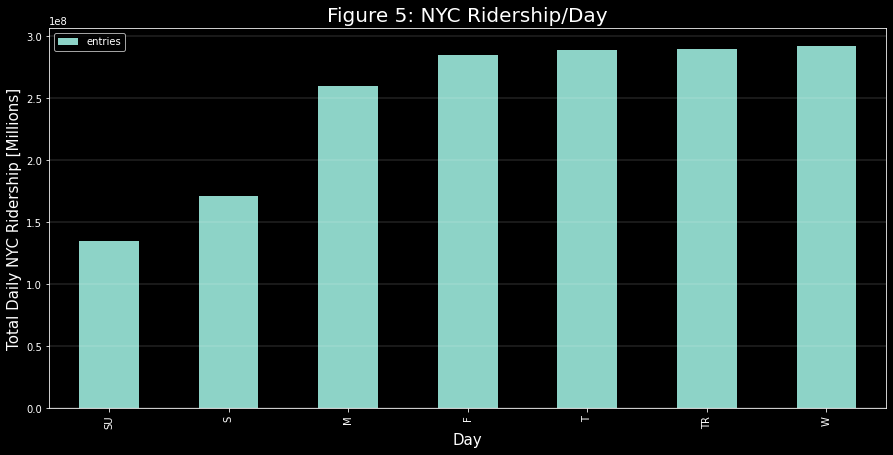

In [ ]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(15, 7))

mta19stationsday.plot(kind="bar", x="day", y="entries", ax=ax)
plt.title('Figure 5: NYC Ridership/Day', fontsize = 20)
plt.xlabel('Day', fontsize =15)
plt.ylabel('Total Daily NYC Ridership [Millions]', fontsize = 15)
ax.grid(axis='y', lw=.2)
plt.show()


Figure 5 above plots the total count of ridership ('entries') for the NYC subway system for the year 2019 by day starting with the day with the least amount of ridership onwards (asecnding). Figure 5 shows that Sunday by far is the least busy day for registering ridership entries in 2019. 

**Which month of the year has the least ridership (entries) in the whole city in 2019?**

In [ ]:
mta19stations 

,date,gtfs_longitude,gtfs_latitude,entries,exits,day
0,2019-01-01,-30977.889661,17065.474817,2326253.0,1980678.0,T
1,2019-01-02,-30904.128308,17024.874751,4874104.0,3721290.0,W
2,2019-01-03,-30904.128308,17024.874751,5313423.0,4062817.0,TR
3,2019-01-04,-30830.174153,16984.287855,5286626.0,4056297.0,F
4,2019-01-05,-30977.889661,17065.474817,2866267.0,2397058.0,S
...,...,...,...,...,...,...
360,2019-12-27,-31273.650628,17228.566360,4300263.0,3538811.0,F
361,2019-12-28,-31273.650628,17228.566360,3217603.0,2772320.0,S
362,2019-12-29,-31273.650628,17228.566360,2713548.0,2380748.0,SU
363,2019-12-30,-31273.650628,17228.566360,4197229.0,3454194.0,M


In [ ]:
mta19stations['month'] = mta19stations['date'].dt.month



In [ ]:
mta19stations

,date,gtfs_longitude,gtfs_latitude,entries,exits,day,month
0,2019-01-01,-30977.889661,17065.474817,2326253.0,1980678.0,T,1
1,2019-01-02,-30904.128308,17024.874751,4874104.0,3721290.0,W,1
2,2019-01-03,-30904.128308,17024.874751,5313423.0,4062817.0,TR,1
3,2019-01-04,-30830.174153,16984.287855,5286626.0,4056297.0,F,1
4,2019-01-05,-30977.889661,17065.474817,2866267.0,2397058.0,S,1
...,...,...,...,...,...,...,...
360,2019-12-27,-31273.650628,17228.566360,4300263.0,3538811.0,F,12
361,2019-12-28,-31273.650628,17228.566360,3217603.0,2772320.0,S,12
362,2019-12-29,-31273.650628,17228.566360,2713548.0,2380748.0,SU,12
363,2019-12-30,-31273.650628,17228.566360,4197229.0,3454194.0,M,12


In [ ]:
mta19stations['day'] = mta19stations['date'].dt.day

In [ ]:
mta19stations

,date,gtfs_longitude,gtfs_latitude,entries,exits,day,month
0,2019-01-01,-30977.889661,17065.474817,2326253.0,1980678.0,1,1
1,2019-01-02,-30904.128308,17024.874751,4874104.0,3721290.0,2,1
2,2019-01-03,-30904.128308,17024.874751,5313423.0,4062817.0,3,1
3,2019-01-04,-30830.174153,16984.287855,5286626.0,4056297.0,4,1
4,2019-01-05,-30977.889661,17065.474817,2866267.0,2397058.0,5,1
...,...,...,...,...,...,...,...
360,2019-12-27,-31273.650628,17228.566360,4300263.0,3538811.0,27,12
361,2019-12-28,-31273.650628,17228.566360,3217603.0,2772320.0,28,12
362,2019-12-29,-31273.650628,17228.566360,2713548.0,2380748.0,29,12
363,2019-12-30,-31273.650628,17228.566360,4197229.0,3454194.0,30,12


In [ ]:
mta19stations['year'] = mta19stations['date'].dt.year

In [ ]:
mta19stations

,date,gtfs_longitude,gtfs_latitude,entries,exits,day,month,year
0,2019-01-01,-30977.889661,17065.474817,2326253.0,1980678.0,1,1,2019
1,2019-01-02,-30904.128308,17024.874751,4874104.0,3721290.0,2,1,2019
2,2019-01-03,-30904.128308,17024.874751,5313423.0,4062817.0,3,1,2019
3,2019-01-04,-30830.174153,16984.287855,5286626.0,4056297.0,4,1,2019
4,2019-01-05,-30977.889661,17065.474817,2866267.0,2397058.0,5,1,2019
...,...,...,...,...,...,...,...,...
360,2019-12-27,-31273.650628,17228.566360,4300263.0,3538811.0,27,12,2019
361,2019-12-28,-31273.650628,17228.566360,3217603.0,2772320.0,28,12,2019
362,2019-12-29,-31273.650628,17228.566360,2713548.0,2380748.0,29,12,2019
363,2019-12-30,-31273.650628,17228.566360,4197229.0,3454194.0,30,12,2019


In [ ]:
mta19stationsmonth = mta19stations.groupby("month").sum().reset_index()

In [ ]:
mta19stationsmonth

,month,gtfs_longitude,gtfs_latitude,entries,exits,day,year
0,1,-962091.752564,530012.997745,136558205.0,105615523.0,496,62589
1,2,-872485.958218,480649.877652,128213554.0,99196981.0,406,56532
2,3,-965493.788397,531887.025719,146387461.0,113728138.0,496,62589
3,4,-931929.021521,513393.353199,146948812.0,114371472.0,465,60570
4,5,-964385.360037,531274.738467,152945590.0,119281717.0,496,62589
5,6,-934883.287545,515023.434281,143489227.0,113538715.0,465,60570
6,7,-965860.885036,532089.798845,141347417.0,113629422.0,496,62589
7,8,-966896.128145,532658.909001,139154064.0,112655843.0,496,62589
8,9,-934807.697454,514983.621268,145027634.0,115582648.0,465,60570
9,10,-967191.716335,532821.679162,157101459.0,124991309.0,496,62589


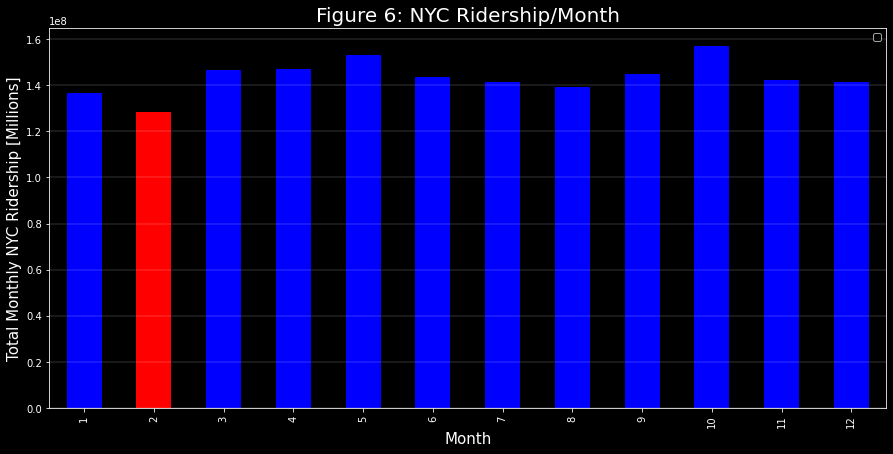

In [ ]:
plt.style.use('dark_background')
my_colors = 'blue', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 

fig, ax = plt.subplots(figsize=(15, 7))

mta19stationsmonth.plot(kind="bar", x="month", y="entries", ax=ax, color = my_colors)
plt.title('Figure 6: NYC Ridership/Month', fontsize = 20)
plt.xlabel('Month', fontsize =15)
plt.ylabel('Total Monthly NYC Ridership [Millions]', fontsize = 15)
ax.grid(axis='y', lw=.2)
ax.legend("")
plt.show()

Figure 6 plots the total monthly NYC subway ridership for the year 2019 in blue. The lowest total monthly ridership for NYC subway system is plotted in red which corresponds to the month of February. Thus, February out of all other months experienced the lowest cumulative monthly subway ridership in NYC for 2019. 

**Which station has the lowest total 2020 ridership (entries) in each borough?**

In [ ]:
mta20

,stop_name,daytime_routes,division,line,borough,structure,gtfs_longitude,gtfs_latitude,complex_id,date,entries,exits
0,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-01,5812.0,6659.0
1,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-02,15506.0,14307.0
2,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-03,15959.0,14500.0
3,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-04,9265.0,9161.0
4,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-05,7191.0,7743.0
...,...,...,...,...,...,...,...,...,...,...,...,...
153292,Lorimer St,J M,BMT,Jamaica,Bk,Elevated,-73.947408,40.703869,99,2020-12-21,1771.0,1842.0
153293,Lorimer St,J M,BMT,Jamaica,Bk,Elevated,-73.947408,40.703869,99,2020-12-22,1775.0,1783.0
153294,Lorimer St,J M,BMT,Jamaica,Bk,Elevated,-73.947408,40.703869,99,2020-12-23,1767.0,1860.0
153295,Lorimer St,J M,BMT,Jamaica,Bk,Elevated,-73.947408,40.703869,99,2020-12-24,1465.0,1545.0


In [ ]:
mta20bs = mta20.groupby(["borough", "stop_name"]).sum()

In [ ]:
mta20bs
mta20bs = mta20bs.drop(columns=['gtfs_longitude', 'gtfs_latitude', 'exits'])

In [ ]:
mta20bs = mta20bs

In [ ]:
mta20bs = mta20bs.unstack('borough')

In [ ]:
mta20bs = mta20bs.reset_index()

In [ ]:

mta20bs

stop_name    entries                                    
borough                                Bk        Bx          M          Q  SI
0                         1 Av        NaN       NaN  2109144.0        NaN NaN
1                       103 St        NaN       NaN  3682813.0        NaN NaN
2        103 St - Corona Plaza        NaN       NaN        NaN  3194048.0 NaN
3                       104 St        NaN       NaN        NaN   608728.0 NaN
4                       110 St        NaN       NaN  1390755.0        NaN NaN
..                         ...        ...       ...        ...        ...  ..
335             Woodhaven Blvd        NaN       NaN        NaN  3247022.0 NaN
336                   Woodlawn        NaN  950437.0        NaN        NaN NaN
337           Woodside - 61 St        NaN       NaN        NaN  2321736.0 NaN
338                    York St  1212528.0       NaN        NaN        NaN NaN
339                  Zerega Av        NaN  347030.0        NaN        NaN NaN

[340 rows x 6 columns]

**Brooklyn Lowest Ridership Station**

In [ ]:
mta20bs['entries', 'Bk'].sort_values()
mta20bs['entries', 'Bk'].iloc[269]
mta20bs['stop_name'].iloc[269]

'Neptune Av'

**Bronx Lowest Ridership Station**

In [ ]:
mta20bs['entries', 'Bx'].sort_values()
mta20bs['entries', 'Bx'].iloc[188]
mta20bs['stop_name'].iloc[188]

"E 143 St - St Mary's St"

**Manhattan Lowest Ridership station**

In [ ]:
mta20bs['entries', 'M'].sort_values()
mta20bs['entries', 'M'].iloc[40]
mta20bs['stop_name'].iloc[40]

'215 St'

**Queens Lowest Ridership Station**

In [ ]:
mta20bs['entries', 'Q'].sort_values()
mta20bs['entries', 'Q'].iloc[147]
mta20bs['stop_name'].iloc[147]

'Broad Channel'

**SI Lowest Ridership Station**

In [ ]:
mta20bs['entries', 'SI'].sort_values()
mta20bs['entries', 'SI'].iloc[317]
mta20bs['stop_name'].iloc[317]

'Tompkinsville'

**Decompose the total (summed across the whole city) daily entries time series into a trend, a periodicity (seasonality), and residual for each year.**

***First for 2019***

In [ ]:
mta19ts = mta19.groupby('date').sum()
mta19ts


,gtfs_longitude,gtfs_latitude,entries,exits
date,,,,
2019-01-01,-30977.889661,17065.474817,2326253.0,1980678.0
2019-01-02,-30904.128308,17024.874751,4874104.0,3721290.0
2019-01-03,-30904.128308,17024.874751,5313423.0,4062817.0
2019-01-04,-30830.174153,16984.287855,5286626.0,4056297.0
2019-01-05,-30977.889661,17065.474817,2866267.0,2397058.0
...,...,...,...,...
2019-12-27,-31273.650628,17228.566360,4300263.0,3538811.0
2019-12-28,-31273.650628,17228.566360,3217603.0,2772320.0
2019-12-29,-31273.650628,17228.566360,2713548.0,2380748.0


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
mta19ts['entries']

date
2019-01-01    2326253.0
2019-01-02    4874104.0
2019-01-03    5313423.0
2019-01-04    5286626.0
2019-01-05    2866267.0
                ...    
2019-12-27    4300263.0
2019-12-28    3217603.0
2019-12-29    2713548.0
2019-12-30    4197229.0
2019-12-31    4073177.0
Name: entries, Length: 365, dtype: float64

In [ ]:
# decompose the time series 
res_mul = seasonal_decompose(mta19ts['entries'], model="mul")

In [ ]:
res_mul.seasonal

date
2019-01-01    1.172853
2019-01-02    1.189100
2019-01-03    1.174801
2019-01-04    1.162115
2019-01-05    0.699635
                ...   
2019-12-27    1.162115
2019-12-28    0.699635
2019-12-29    0.546499
2019-12-30    1.054997
2019-12-31    1.172853
Name: entries, Length: 365, dtype: float64

**Figure 8** 

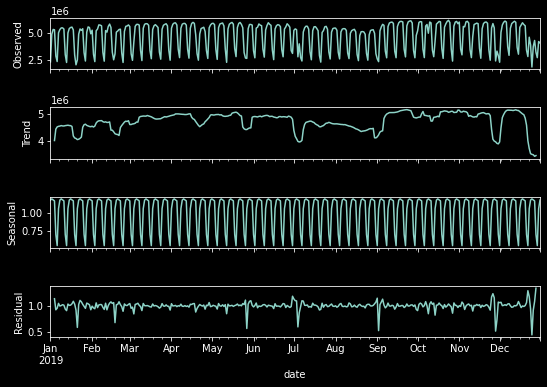

In [ ]:
# -- plot the decomposition
fig = res_mul.plot()
fig.set_size_inches(8, 6)


Figure 8 above plots the seasonal decomposition for total numbers of NYC subway ridership in 2019 into a trend, seasonal component, and residual. We see that upon looking at figure 9 -- there is no clear trend that we can really make out in the data -- it is relatively stable but does experience some bursts of volatitlity. The seasonal component shows us that our data has an extensive bit of seasonality in what looks like to be in this case every week where the arrival of the weekend causes ridership to signfificantly drop. The residuals show us that that there is a fair bit of heteroscedasticity occurring in the data



***Now for 2020***

In [ ]:
mta20ts = mta20.groupby('date').sum()
mta20ts

,gtfs_longitude,gtfs_latitude,entries,exits
date,,,,
2020-01-01,-31495.574675,17350.851173,2308737.0,2054459.0
2020-01-02,-31495.574675,17350.851173,4999970.0,4028914.0
2020-01-03,-31421.611693,17310.200646,4964330.0,4002503.0
2020-01-04,-31421.562956,17310.216109,2808309.0,2414338.0
2020-01-05,-31421.562956,17310.216109,2284310.0,1991875.0
...,...,...,...,...
2020-12-21,-31421.641079,17310.001668,1576155.0,1610311.0
2020-12-22,-31421.641079,17310.001668,1613502.0,1655369.0
2020-12-23,-31421.641079,17310.001668,1622326.0,1671912.0


In [ ]:
mta20ts['entries']

date
2020-01-01    2308737.0
2020-01-02    4999970.0
2020-01-03    4964330.0
2020-01-04    2808309.0
2020-01-05    2284310.0
                ...    
2020-12-21    1576155.0
2020-12-22    1613502.0
2020-12-23    1622326.0
2020-12-24    1214913.0
2020-12-25     433558.0
Name: entries, Length: 360, dtype: float64

In [ ]:
# decompose the time series 
res_mul = seasonal_decompose(mta20ts['entries'], model="mul")

In [ ]:
res_mul.seasonal

date
2020-01-01    1.177292
2020-01-02    1.152781
2020-01-03    1.155674
2020-01-04    0.699640
2020-01-05    0.549203
                ...   
2020-12-21    1.091244
2020-12-22    1.174166
2020-12-23    1.177292
2020-12-24    1.152781
2020-12-25    1.155674
Name: entries, Length: 360, dtype: float64

**Figure 9**

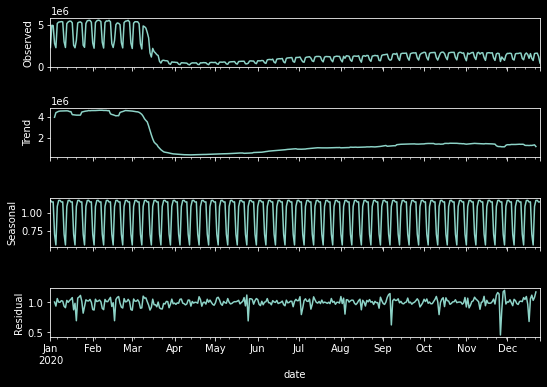

In [ ]:
# -- plot the decomposition
fig = res_mul.plot()
fig.set_size_inches(8, 6)


Figure 9 above plots the decomposition for our 2020 time series for NYC diership. Overall, it shows the trend and the steep drop the pandemic had caused in March of 2020 where the trend in ridership remained low thereafter nowhere comparable to where it was pre March of 2020. There also exhibits a substantial amount of seasonality in the 2020 series as well for 2020 NYC subway ridership. 

**To what do the anomalies in the residual time series correspond?**

The anamolies in the residual time series for 2019 and 2020 NYC subway ridership correspond to what appears to be the impact of national holiday's on ridership. For instance, the residual plots in both the 2019 and 2020 decompositions show that an enhanced level of volatiilty (wherein there were significant drops in ridership) occurred all around major holidays such as Labor Day/9/11; Thanksgiving Time; Chirstmas Time etc. which makes sense given the importance of these holiday's and folks using them to take a break from work/travel etc. and to spend time with family or simply some much needed R&R. Interestingly enough, however, the volatility as shown in the residuals appears to be more intense for 2019 relative to 2020 data quite possibly due to the dampened impacts of the pandemic on ridership in 2020 in which ridership in 2020 (during the pandemic) remained well below that of pre covid times such as those in 2019.

**Demonstrate that the time series has weekly periodicity (when removing the trend, use a 30 day rolling average).**

In [ ]:
mta19ts 

,gtfs_longitude,gtfs_latitude,entries,exits
date,,,,
2019-01-01,-30977.889661,17065.474817,2326253.0,1980678.0
2019-01-02,-30904.128308,17024.874751,4874104.0,3721290.0
2019-01-03,-30904.128308,17024.874751,5313423.0,4062817.0
2019-01-04,-30830.174153,16984.287855,5286626.0,4056297.0
2019-01-05,-30977.889661,17065.474817,2866267.0,2397058.0
...,...,...,...,...
2019-12-27,-31273.650628,17228.566360,4300263.0,3538811.0
2019-12-28,-31273.650628,17228.566360,3217603.0,2772320.0
2019-12-29,-31273.650628,17228.566360,2713548.0,2380748.0


In [ ]:
mta19tsRA = mta19ts.columns[[2, 3]]

In [ ]:
mta19tsRA

Index(['entries', 'exits'], dtype='object')

In [ ]:
mta19tsRA = mta19ts[mta19tsRA]

In [ ]:
mta19tsRA

,entries,exits
date,,
2019-01-01,2326253.0,1980678.0
2019-01-02,4874104.0,3721290.0
2019-01-03,5313423.0,4062817.0
2019-01-04,5286626.0,4056297.0
2019-01-05,2866267.0,2397058.0
...,...,...
2019-12-27,4300263.0,3538811.0
2019-12-28,3217603.0,2772320.0
2019-12-29,2713548.0,2380748.0


In [ ]:
#mta19tsRA = mta19tsRA.drop(columns=['gtfs_longitude'])

In [ ]:
mta19tsRA.dtypes

entries    float64
exits      float64
dtype: object

In [ ]:
mta19tsRA

,entries,exits
date,,
2019-01-01,2326253.0,1980678.0
2019-01-02,4874104.0,3721290.0
2019-01-03,5313423.0,4062817.0
2019-01-04,5286626.0,4056297.0
2019-01-05,2866267.0,2397058.0
...,...,...
2019-12-27,4300263.0,3538811.0
2019-12-28,3217603.0,2772320.0
2019-12-29,2713548.0,2380748.0


In [ ]:
mta19tsRA.index

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10',
               ...
               '2019-12-22', '2019-12-23', '2019-12-24', '2019-12-25',
               '2019-12-26', '2019-12-27', '2019-12-28', '2019-12-29',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', name='date', length=365, freq=None)

In [ ]:
mta19tsRA = mta19tsRA.rolling(30, center=True).mean()

In [ ]:
mta19tsRA['entries'].unique()

array([             nan, 4388082.53333333, 4474398.4       ,
       4486809.23333333, 4410761.63333333, 4312748.3       ,
       4390322.83333333, 4490079.6       , 4514379.23333333,
       4527868.86666667, 4534304.86666667, 4458812.83333333,
       4359958.3       , 4433815.1       , 4527225.06666667,
       4547358.06666667, 4561017.8       , 4560747.96666667,
       4483518.2       , 4391568.3       , 4394541.96666667,
       4494985.06666667, 4583737.83333333, 4598007.3       ,
       4597300.16666667, 4527879.33333333, 4424138.83333333,
       4489145.23333333, 4595864.5       , 4614690.9       ,
       4620779.03333333, 4623789.73333333, 4562202.96666667,
       4469488.86666667, 4506230.8       , 4614776.43333333,
       4634301.56666667, 4648900.23333333, 4648348.63333333,
       4570555.96666667, 4463674.56666667, 4537896.        ,
       4651299.6       , 4672568.73333333, 4698097.2       ,
       4701481.76666667, 4620174.36666667, 4524282.1       ,
       4594228.6       ,

In [ ]:
mta19tsRA

,entries,exits
date,,
2019-01-01,NaN,NaN
2019-01-02,NaN,NaN
2019-01-03,NaN,NaN
2019-01-04,NaN,NaN
2019-01-05,NaN,NaN
...,...,...
2019-12-27,NaN,NaN
2019-12-28,NaN,NaN
2019-12-29,NaN,NaN


In [ ]:
# isolate the short time scale and detrend the data 
# -- isolate short time scale behavior  ## -- This detrends the data it is a form of ridding the data of stationarity
mta19tsRAshort = mta19ts - mta19tsRA

In [ ]:
mta19tsRAshort

,entries,exits,gtfs_latitude,gtfs_longitude
date,,,,
2019-01-01,NaN,NaN,NaN,NaN
2019-01-02,NaN,NaN,NaN,NaN
2019-01-03,NaN,NaN,NaN,NaN
2019-01-04,NaN,NaN,NaN,NaN
2019-01-05,NaN,NaN,NaN,NaN
...,...,...,...,...
2019-12-27,NaN,NaN,NaN,NaN
2019-12-28,NaN,NaN,NaN,NaN
2019-12-29,NaN,NaN,NaN,NaN


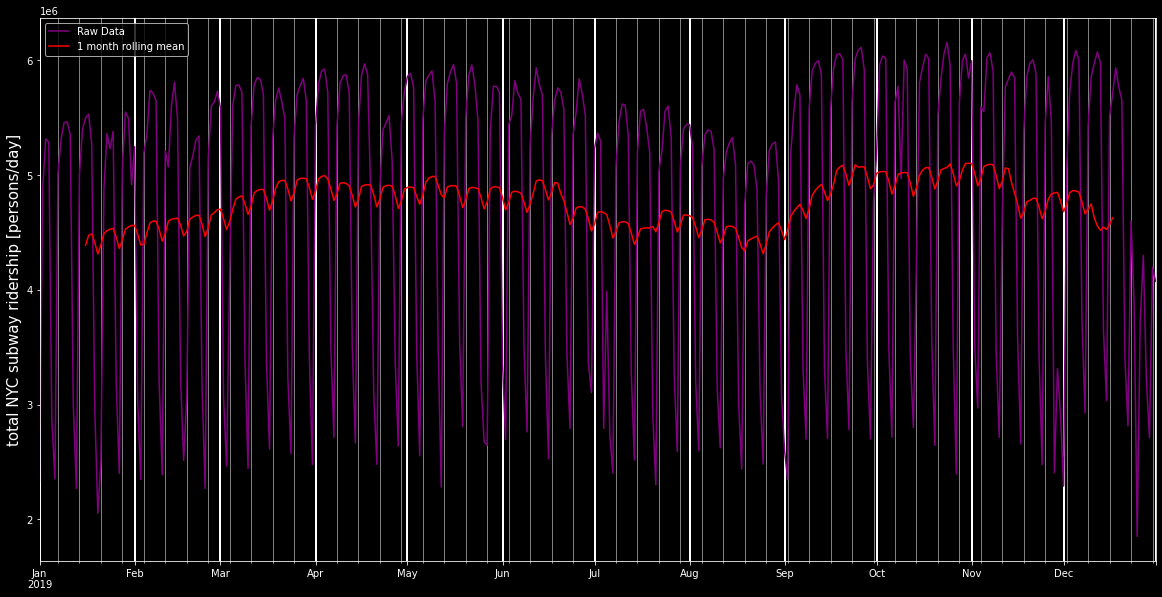

In [ ]:
# -- plot the two
fig, ax = plt.subplots(figsize=(20, 10))
mta19ts.plot(y='entries', label='Raw Data', color='purple', ax=ax)
mta19tsRA.plot(y='entries', color="red", label="1 month rolling mean", ax=ax)
ax.grid(axis="x", which='major', lw=2) # to set the grid lines on either the major ticks or the minor tick marks using which method
ax.grid(axis="x", which='minor', lw=0.5) 
ax.set_xlabel("")
ax.legend()
ax.set_ylabel("total NYC subway ridership [persons/day]", fontsize=15)
fig.show()

Figure 10 above plots our data for NYC subway ridership in 2019 of the raw data shown in purple and the 1 month rolling mean shown in red. It is clearly discernible from the rolling mean in red that there is weekly periodicity in the data as is evidenced by the spkes up and down (albeit short) in between the minor grid lines on the x-axis which represents time. The raw data in purple shows a similar phenomenon occurring albeit with more variation given that the data isn't smoothed. In the end, there is clear weekly periodicity occurring where when it appears like the weekend arrives -- ridership drops sharply and once Monday picks up again -- ridership rises alongside it. 

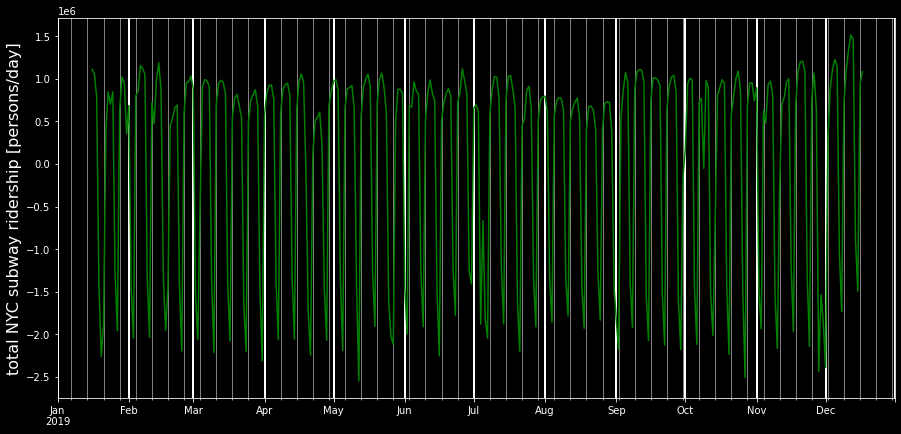

In [ ]:
# -- plot the the short time scale (high frequency) behavior
fig, ax = plt.subplots(figsize=(15, 7))
mta19tsRAshort.plot(y='entries', legend=False, color='green', ax=ax)
ax.grid(axis="x", which='major', lw=2) # to set the grid lines on either the major ticks or the minor tick marks using which method
ax.grid(axis="x", which='minor', lw=0.5) 

ax.set_xlabel("")
ax.set_ylabel("total NYC subway ridership [persons/day]", fontsize=16)
fig.show()

Figure 11 above isolates the short term scale of our data and effectively detrends 2019 entries in NYC subway ridership by taking the raw data minused the smoothed data with the 30 day rolling average to come about a detrended form of our data where once again -- depicts clear evidence of weekly periodicity. 

In [ ]:
mta19tsRA

,entries,exits
date,,
2019-01-01,NaN,NaN
2019-01-02,NaN,NaN
2019-01-03,NaN,NaN
2019-01-04,NaN,NaN
2019-01-05,NaN,NaN
...,...,...
2019-12-27,NaN,NaN
2019-12-28,NaN,NaN
2019-12-29,NaN,NaN


In [ ]:
entries = mta19ts['entries']
result = entries.autocorr(lag=7)
print("The ACF for entries for 2019 NYC subway data is: {0:.3f} and this signifies a great amount of weekly periodicity".format(result))



The ACF for entries for 2019 NYC subway data is: 0.844 and this signifies a great amount of weekly periodicity


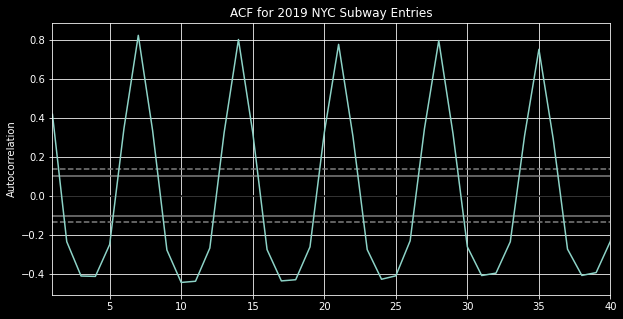

In [ ]:
# -- check auto-correlation
fig, ax = plt.subplots(sharex=True, figsize=(10, 5))
pd.plotting.autocorrelation_plot(mta19ts['entries'], ax=ax)
ax.set_xlabel("")
ax.set_title("ACF for 2019 NYC Subway Entries")
ax.set_xlim(1,40)
fig.show()

**ACF** The ACF plot above for our 2019 NYC ridership data shows clear weekly periodocity occuring in the series occurring roughly every 7 days we have a peak in the series followed by a fall and the pattern repeats. 

***For 2020 now ***

In [ ]:
mta20ts

,gtfs_longitude,gtfs_latitude,entries,exits
date,,,,
2020-01-01,-31495.574675,17350.851173,2308737.0,2054459.0
2020-01-02,-31495.574675,17350.851173,4999970.0,4028914.0
2020-01-03,-31421.611693,17310.200646,4964330.0,4002503.0
2020-01-04,-31421.562956,17310.216109,2808309.0,2414338.0
2020-01-05,-31421.562956,17310.216109,2284310.0,1991875.0
...,...,...,...,...
2020-12-21,-31421.641079,17310.001668,1576155.0,1610311.0
2020-12-22,-31421.641079,17310.001668,1613502.0,1655369.0
2020-12-23,-31421.641079,17310.001668,1622326.0,1671912.0


In [ ]:
mta20tsRA = mta20ts.columns[[2, 3]]

In [ ]:
mta20tsRA

Index(['entries', 'exits'], dtype='object')

In [ ]:
mta20tsRA = mta20ts[mta20tsRA]

In [ ]:
mta20tsRA

,entries,exits
date,,
2020-01-01,2308737.0,2054459.0
2020-01-02,4999970.0,4028914.0
2020-01-03,4964330.0,4002503.0
2020-01-04,2808309.0,2414338.0
2020-01-05,2284310.0,1991875.0
...,...,...
2020-12-21,1576155.0,1610311.0
2020-12-22,1613502.0,1655369.0
2020-12-23,1622326.0,1671912.0


In [ ]:
mta20tsRA.dtypes

entries    float64
exits      float64
dtype: object

In [ ]:
mta20tsRA = mta20tsRA.rolling(30, center=True).mean()

In [ ]:
mta20tsRA

,entries,exits
date,,
2020-01-01,NaN,NaN
2020-01-02,NaN,NaN
2020-01-03,NaN,NaN
2020-01-04,NaN,NaN
2020-01-05,NaN,NaN
...,...,...
2020-12-21,NaN,NaN
2020-12-22,NaN,NaN
2020-12-23,NaN,NaN


In [ ]:
mta20tsRA['entries'].unique()

array([             nan, 4423667.1       , 4525679.56666667,
       4454206.23333333, 4362855.43333333, 4446880.63333333,
       4555286.63333333, 4568287.53333333, 4575219.4       ,
       4576193.56666667, 4492541.6       , 4386934.36666667,
       4464169.33333333, 4571781.56666667, 4582063.53333333,
       4588594.23333333, 4585760.26666667, 4495181.63333333,
       4395577.06666667, 4414674.26666667, 4508123.06666667,
       4578348.53333333, 4576896.93333333, 4566723.43333333,
       4483276.46666667, 4382756.6       , 4473627.9       ,
       4579044.46666667, 4589465.26666667, 4591184.66666667,
       4585296.73333333, 4493386.33333333, 4387442.03333333,
       4467615.53333333, 4574557.13333333, 4577836.33333333,
       4574107.8       , 4559904.93333333, 4465829.56666667,
       4355372.96666667, 4421565.1       , 4507670.5       ,
       4485471.26666667, 4438648.4       , 4370856.        ,
       4239636.7       , 4097637.1       , 4078336.83333333,
       4061800.7       ,

In [ ]:
#mta19tsRA['entries'].unique()

In [ ]:
# isolate the short time scale and detrend the data 
# -- isolate short time scale behavior  ## -- This detrends the data it is a form of ridding the data of stationarity
mta20tsRAshort = mta20ts - mta20tsRA

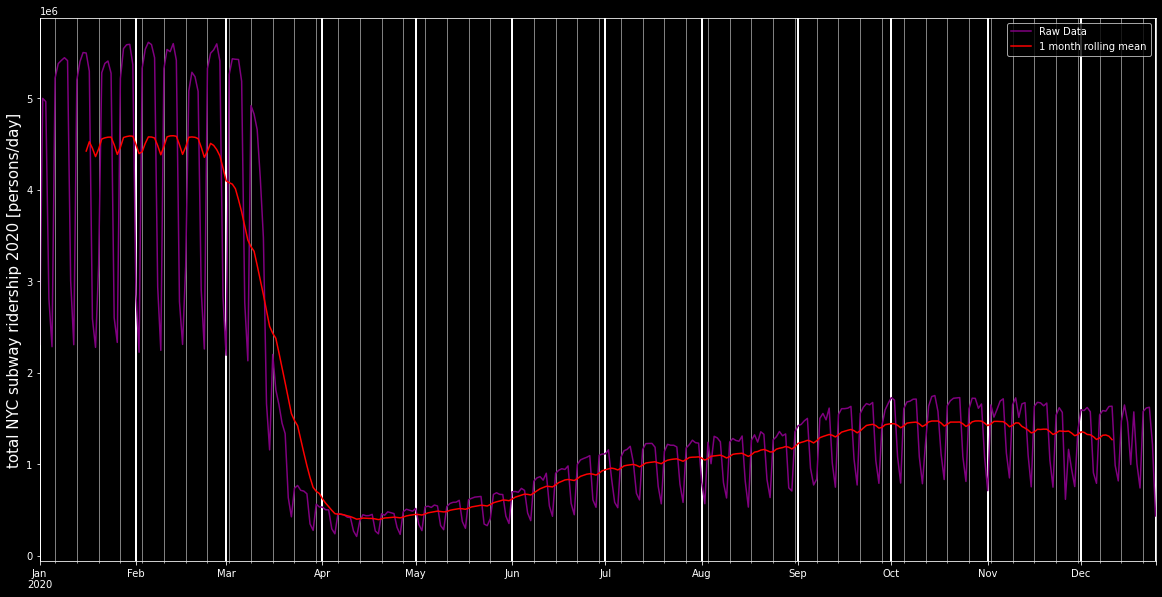

In [ ]:
# -- plot the two
fig, ax = plt.subplots(figsize=(20, 10))
mta20ts.plot(y='entries', label='Raw Data', color='purple', ax=ax)
mta20tsRA.plot(y='entries', color="red", label="1 month rolling mean", ax=ax)
ax.grid(axis="x", which='major', lw=2) # to set the grid lines on either the major ticks or the minor tick marks using which method
ax.grid(axis="x", which='minor', lw=0.5) 
ax.set_xlabel("")
ax.legend()
ax.set_ylabel("total NYC subway ridership 2020 [persons/day]", fontsize=15)
fig.show()

Figure 12 plots total NYC ridership for the subway system in purple which corresponds to the raw data and the smoothed version of said data with the 30 day rolling average plotted in red. Overall -- there does appear to be periodicity occurring but lets detrend the data and see for ourselves a better picture below with figure 13 which plots the detrended data. 

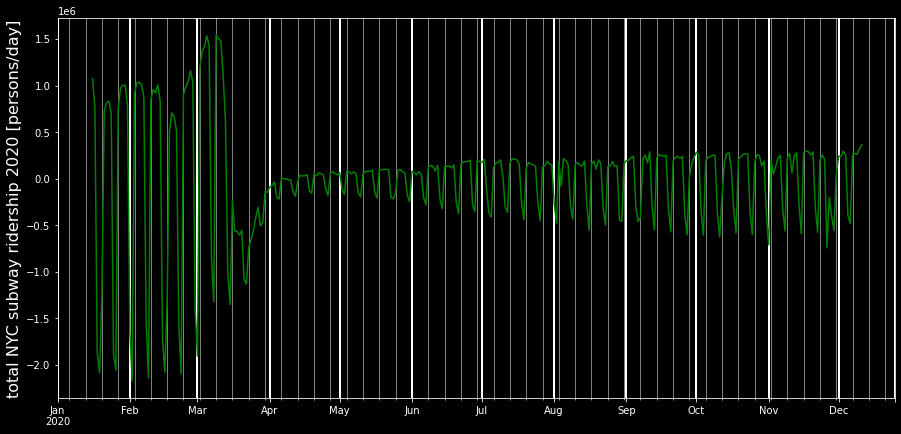

In [ ]:
# -- plot the the short time scale (high frequency) behavior
fig, ax = plt.subplots(figsize=(15, 7))
mta20tsRAshort.plot(y='entries', legend=False, color='green', ax=ax)
ax.grid(axis="x", which='major', lw=2) # to set the grid lines on either the major ticks or the minor tick marks using which method
ax.grid(axis="x", which='minor', lw=0.5) 

ax.set_xlabel("")
ax.set_ylabel("total NYC subway ridership 2020 [persons/day]", fontsize=16)
fig.show()

Figure 13 plots the detrended data where I took our raw data for 2020 subway ridership totals and subtracted our 30 day rolling average from said data in order to isolate its short term time scale. Overall, figure 13 and the data plotted in greeen depict clear and convincing evidence that we do have weekly periodicity occurring even in 2020 in which the time series also displays the impacted imprints of the effect of the pandemic. Even once March 2020 occurred with the pandemic -- we still had weekly periodicity in subway ridership as is evidenced by the ups and downs shown in the minor grid lines between each month on the x-axis. Once more, ridership appears to drastically drop off come the weekend and pick right back up again once the work week starts on Monday. 

In [ ]:
entries = mta20ts['entries']
result = entries.autocorr(lag=7)
print("The ACF for entries for 2020 NYC subway data is: {0:.3f} -- a significant bit of weekly periodicity".format(result))

The ACF for entries for 2020 NYC subway data is: 0.948 -- a significant bit of weekly periodicity


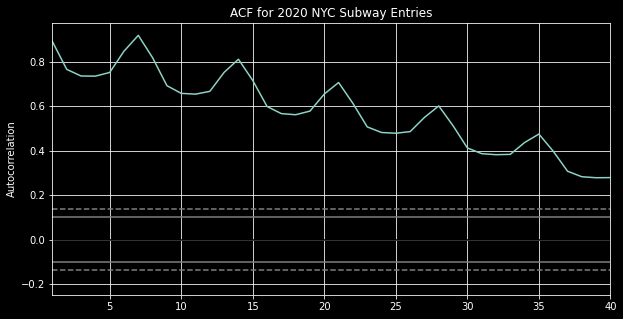

In [ ]:
# -- check auto-correlation
fig, ax = plt.subplots(sharex=True, figsize=(10, 5))
pd.plotting.autocorrelation_plot(mta20ts['entries'], ax=ax)
ax.set_xlabel("")
ax.set_title("ACF for 2020 NYC Subway Entries")
ax.set_xlim(1,40)
fig.show()

**ACF** The ACF plot for our 2020 data differs significantly from that of our 2019 data in the fact that there is no reversion to the mean in the series. Nonetheless, we can still discern that there is periodiscity in our 2019 subway ridership about every 7 days as there is a peak in the data roughly every 7 days followed by a slow descent and the sequence repeats. 

**Find the station with weakest weekly periodicity in 2019 and plot its time series.**


In [ ]:
mta19

,stop_name,daytime_routes,division,line,borough,structure,gtfs_longitude,gtfs_latitude,complex_id,date,entries,exits
0,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2019-01-01,5896.0,5319.0
1,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2019-01-02,14472.0,9702.0
2,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2019-01-03,15674.0,12234.0
3,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2019-01-04,15534.0,13489.0
4,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2019-01-05,7813.0,8937.0
...,...,...,...,...,...,...,...,...,...,...,...,...
153784,Lorimer St,J M,BMT,Jamaica,Bk,Elevated,-73.947408,40.703869,99,2019-12-27,4047.0,3219.0
153785,Lorimer St,J M,BMT,Jamaica,Bk,Elevated,-73.947408,40.703869,99,2019-12-28,3703.0,3170.0
153786,Lorimer St,J M,BMT,Jamaica,Bk,Elevated,-73.947408,40.703869,99,2019-12-29,3520.0,3015.0
153787,Lorimer St,J M,BMT,Jamaica,Bk,Elevated,-73.947408,40.703869,99,2019-12-30,4367.0,3338.0


In [ ]:
weakestperiodicity = mta19.groupby(['date', 'stop_name']).sum()

In [ ]:
weakestperiodicity.head(3)

gtfs_longitude  ...    exits
date       stop_name                              ...         
2019-01-01 1 Av                       -73.981628  ...  13969.0
           103 St                    -221.877311  ...  11682.0
           103 St - Corona Plaza      -73.862700  ...   8070.0

[3 rows x 4 columns]

In [ ]:
weakestperiodicityentries = weakestperiodicity.columns[2]

In [ ]:
weakestperiodicityentries

'entries'

In [ ]:
weakestperiodicity = weakestperiodicity[weakestperiodicityentries]

In [ ]:
weakestperiodicity = weakestperiodicity.unstack('stop_name')

In [ ]:
#weakestperiodicity = weakestperiodicity['1 Av']

In [ ]:
weakestperiodicity = weakestperiodicity

In [ ]:
weakestperiodicity.head(3)

stop_name,1 Av,103 St,103 St - Corona Plaza,104 St,110 St,111 St,116 St,116 St - Columbia University,121 St,125 St,135 St,137 St - City College,138 St - Grand Concourse,14 St - Union Sq,145 St,15 St - Prospect Park,155 St,157 St,161 St - Yankee Stadium,163 St - Amsterdam Av,167 St,168 St,169 St,170 St,174 St,174-175 Sts,175 St,176 St,18 Av,18 St,181 St,182-183 Sts,183 St,190 St,191 St,2 Av,20 Av,207 St,21 St,21 St - Queensbridge,...,Roosevelt Island,Saratoga Av,Seneca Av,Sheepshead Bay,Shepherd Av,Simpson St,Smith - 9 Sts,Spring St,St George,St Lawrence Av,Steinway St,Sterling St,Sutphin Blvd,Sutphin Blvd - Archer Av - JFK Airport,Sutter Av,Sutter Av - Rutland Rd,Times Sq - 42 St,Tompkinsville,Tremont Av,Union St,Utica Av,Van Cortlandt Park - 242 St,Van Siclen Av,Vernon Blvd - Jackson Av,W 4 St,W 8 St - NY Aquarium,WTC Cortlandt,Wakefield - 241 St,Wall St,West Farms Sq - E Tremont Av,Westchester Sq - E Tremont Av,Whitehall St,Whitlock Av,Wilson Av,Winthrop St,Woodhaven Blvd,Woodlawn,Woodside - 61 St,York St,Zerega Av
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-01,11487.0,15556.0,8782.0,1224.0,4946.0,6760.0,15937.0,3250.0,977.0,40044.0,9211.0,6344.0,996.0,38364.0,18924.0,2654.0,3395.0,5934.0,9652.0,2051.0,4612.0,9366.0,3318.0,7808.0,2788.0,1714.0,5776.0,2471.0,5691.0,2402.0,10740.0,2352.0,2637.0,2137.0,3876.0,10230.0,3999.0,2664.0,627.0,5299.0,...,4068.0,2116.0,928.0,4378.0,1349.0,3426.0,1787.0,10581.0,3470.0,1889.0,6938.0,2778.0,1863.0,10483.0,1774.0,2847.0,95200.0,231.0,4241.0,3591.0,7905.0,3002.0,3828.0,5770.0,20539.0,1184.0,10616.0,2259.0,9904.0,2923.0,1816.0,15633.0,828.0,2606.0,2462.0,10381.0,2669.0,7347.0,6625.0,875.0
2019-01-02,17191.0,26980.0,18605.0,3436.0,9606.0,14861.0,29250.0,7892.0,2232.0,75715.0,17500.0,10753.0,2887.0,82400.0,29892.0,6083.0,5939.0,9699.0,22363.0,3622.0,9860.0,20895.0,7710.0,15966.0,6324.0,3481.0,11255.0,5139.0,12490.0,6627.0,20329.0,4506.0,5285.0,3987.0,7210.0,13815.0,8459.0,5494.0,1477.0,9710.0,...,6343.0,4982.0,2519.0,12948.0,3097.0,7644.0,4054.0,21350.0,13435.0,3823.0,14367.0,5340.0,4225.0,20504.0,3531.0,6475.0,194200.0,762.0,9513.0,6323.0,14742.0,7353.0,8075.0,13110.0,31376.0,2104.0,14835.0,4597.0,37426.0,6500.0,5509.0,34884.0,1797.0,4052.0,6716.0,23781.0,6179.0,15638.0,10699.0,2592.0
2019-01-03,19367.0,29099.0,19391.0,3589.0,10558.0,15417.0,31138.0,8936.0,2510.0,84942.0,18828.0,11355.0,3220.0,93121.0,31929.0,6399.0,6241.0,10156.0,23518.0,3765.0,10500.0,23708.0,8158.0,17022.0,6862.0,3855.0,11808.0,5482.0,12928.0,8177.0,22115.0,4558.0,5413.0,4282.0,7707.0,15702.0,8589.0,6030.0,1778.0,10295.0,...,6530.0,4816.0,2604.0,4731.0,3241.0,8143.0,4561.0,24496.0,14866.0,4025.0,15652.0,5697.0,4411.0,21027.0,3757.0,6687.0,204757.0,857.0,9885.0,7190.0,15720.0,7575.0,8457.0,14391.0,35199.0,2067.0,14925.0,4862.0,40449.0,6687.0,6089.0,36146.0,1925.0,4247.0,7100.0,24737.0,6553.0,16423.0,11467.0,2698.0


In [ ]:


for col in weakestperiodicity.columns:
  weakestperiodicity[col]
  autocorrelation = weakestperiodicity[col].autocorr(lag=7)
  print("{0} {1},".format(col, autocorrelation))
  
  #print(" {0} {1},".format(col, autocorrelation))
  
  #print("Weekly ACF for station:", col, autocorrelation)
 # print("Station and ACF: {0}".format(col, autocorrelation))

1 Av 0.8298449315549055,
103 St 0.8403005289114027,
103 St - Corona Plaza 0.848376142738705,
104 St 0.8540374868764278,
110 St 0.6887345804734595,
111 St 0.693728667107898,
116 St 0.8023129101460125,
116 St - Columbia University 0.8161433014608462,
121 St 0.7835381751351793,
125 St 0.7541627172317877,
135 St 0.6554554435887603,
137 St - City College 0.7336112330955145,
138 St - Grand Concourse 0.638511162233887,
14 St - Union Sq 0.7516944081860533,
145 St 0.6432459667703111,
15 St - Prospect Park 0.7560339191868638,
155 St 0.7872417733879727,
157 St 0.7240899002125061,
161 St - Yankee Stadium 0.2266086131425594,
163 St - Amsterdam Av 0.7544359357548739,
167 St 0.8520777470290931,
168 St 0.7438300335021425,
169 St 0.804939694260109,
170 St 0.850335048743535,
174 St 0.8241439992020728,
174-175 Sts 0.8606156971744553,
175 St 0.8233696720260851,
176 St 0.8487240200634814,
18 Av 0.8613220332520587,
18 St 0.6363185807213363,
181 St 0.8013487783838473,
182-183 Sts 0.8488031494687996,
183 St 0

In [ ]:
print(list(weakestperiodicity.columns.values))

['1 Av', '103 St', '103 St - Corona Plaza', '104 St', '110 St', '111 St', '116 St', '116 St - Columbia University', '121 St', '125 St', '135 St', '137 St - City College', '138 St - Grand Concourse', '14 St - Union Sq', '145 St', '15 St - Prospect Park', '155 St', '157 St', '161 St - Yankee Stadium', '163 St - Amsterdam Av', '167 St', '168 St', '169 St', '170 St', '174 St', '174-175 Sts', '175 St', '176 St', '18 Av', '18 St', '181 St', '182-183 Sts', '183 St', '190 St', '191 St', '2 Av', '20 Av', '207 St', '21 St', '21 St - Queensbridge', '215 St', '219 St', '225 St', '23 St', '231 St', '233 St', '238 St', '25 Av', '25 St', '28 St', '3 Av', '3 Av - 138 St', '3 Av - 149 St', '30 Av', '33 St', '34 St - 11 Av', '34 St - Herald Sq', '34 St - Penn Station', '36 Av', '36 St', '39 Av', '40 St', '45 St', '46 St', '47-50 Sts - Rockefeller Ctr', '5 Av', '5 Av/53 St', '5 Av/59 St', '50 St', '51 St', '52 St', '53 St', '55 St', '57 St', '57 St - 7 Av', '59 St', '59 St - Columbus Circle', '6 Av', '62

In [ ]:
stations = ['1 Av', '103 St', '103 St - Corona Plaza', '104 St', '110 St', '111 St', '116 St', '116 St - Columbia University', '121 St', '125 St', '135 St', '137 St - City College', '138 St - Grand Concourse', '14 St - Union Sq', '145 St', '15 St - Prospect Park', '155 St', '157 St', '161 St - Yankee Stadium', '163 St - Amsterdam Av', '167 St', '168 St', '169 St', '170 St', '174 St', '174-175 Sts', '175 St', '176 St', '18 Av', '18 St', '181 St', '182-183 Sts', '183 St', '190 St', '191 St', '2 Av', '20 Av', '207 St', '21 St', '21 St - Queensbridge', '215 St', '219 St', '225 St', '23 St', '231 St', '233 St', '238 St', '25 Av', '25 St', '28 St', '3 Av', '3 Av - 138 St', '3 Av - 149 St', '30 Av', '33 St', '34 St - 11 Av', '34 St - Herald Sq', '34 St - Penn Station', '36 Av', '36 St', '39 Av', '40 St', '45 St', '46 St', '47-50 Sts - Rockefeller Ctr', '5 Av', '5 Av/53 St', '5 Av/59 St', '50 St', '51 St', '52 St', '53 St', '55 St', '57 St', '57 St - 7 Av', '59 St', '59 St - Columbus Circle', '6 Av', '62 St', '63 Dr - Rego Park', '65 St', '66 St - Lincoln Center', '67 Av', '68 St - Hunter College', '69 St', '7 Av', '71 St', '72 St', '74 St - Broadway', '75 Av', '75 St', '77 St', '79 St', '8 Av', '8 St - NYU', '80 St', '81 St - Museum of Natural History', '82 St - Jackson Hts', '85 St - Forest Pkwy', '86 St', '88 St', '9 Av', '9 St', '90 St - Elmhurst Av', '96 St', 'Alabama Av', 'Allerton Av', 'Aqueduct - N Conduit Av', 'Aqueduct Racetrack', 'Astor Pl', 'Astoria - Ditmars Blvd', 'Astoria Blvd', 'Atlantic Av', 'Atlantic Av - Barclays Ctr', 'Avenue H', 'Avenue I', 'Avenue J', 'Avenue M', 'Avenue N', 'Avenue P', 'Avenue U', 'Avenue X', 'Bay 50 St', 'Bay Pkwy', 'Bay Ridge - 95 St', 'Bay Ridge Av', 'Baychester Av', 'Beach 105 St', 'Beach 25 St', 'Beach 36 St', 'Beach 44 St', 'Beach 60 St', 'Beach 67 St', 'Beach 90 St', 'Beach 98 St', 'Bedford - Nostrand Avs', 'Bedford Av', 'Bedford Park Blvd', 'Bedford Park Blvd - Lehman College', 'Bergen St', 'Beverley Rd', 'Beverly Rd', 'Bleecker St', 'Borough Hall', 'Botanic Garden', 'Bowery', 'Bowling Green', 'Briarwood - Van Wyck Blvd', 'Brighton Beach', 'Broad Channel', 'Broad St', 'Broadway', 'Broadway Jct', 'Bronx Park East', 'Brook Av', 'Brooklyn Bridge - City Hall', 'Buhre Av', 'Burke Av', 'Burnside Av', 'Bushwick Av - Aberdeen St', 'Canal St', 'Canarsie - Rockaway Pkwy', 'Carroll St', 'Castle Hill Av', 'Cathedral Pkwy', 'Cathedral Pkwy (110 St)', 'Central Av', 'Central Park North (110 St)', 'Chambers St', 'Chauncey St', 'Christopher St - Sheridan Sq', 'Church Av', 'Clark St', 'Classon Av', 'Cleveland St', 'Clinton - Washington Avs', 'Coney Island - Stillwell Av', 'Cortelyou Rd', 'Court Sq', 'Crescent St', 'Crown Hts - Utica Av', 'Cypress Av', 'Cypress Hills', 'DeKalb Av', 'Delancey St', 'Ditmas Av', 'Dyckman St', 'E 105 St', "E 143 St - St Mary's St", 'E 149 St', 'E 180 St', 'East Broadway', 'Eastchester - Dyre Av', 'Eastern Pkwy - Brooklyn Museum', 'Elder Av', 'Elmhurst Av', 'Euclid Av', 'Far Rockaway - Mott Av', 'Flatbush Av - Brooklyn College', 'Flushing - Main St', 'Flushing Av', 'Fordham Rd', 'Forest Av', 'Forest Hills - 71 Av', 'Fort Hamilton Pkwy', 'Franklin Av', 'Franklin St', 'Freeman St', 'Fresh Pond Rd', 'Fulton St', 'Gates Av', 'Graham Av', 'Grand Army Plaza', 'Grand Av - Newtown', 'Grand Central - 42 St', 'Grand St', 'Grant Av', 'Greenpoint Av', 'Gun Hill Rd', 'Halsey St', 'Harlem - 148 St', 'Hewes St', 'High St', 'Houston St', 'Howard Beach - JFK Airport', 'Hoyt - Schermerhorn Sts', 'Hoyt St', 'Hunters Point Av', 'Hunts Point Av', 'Intervale Av', 'Inwood - 207 St', 'Jackson Av', 'Jamaica - 179 St', 'Jamaica - Van Wyck', 'Jamaica Center - Parsons/Archer', 'Jay St - MetroTech', 'Jefferson St', 'Junction Blvd', 'Junius St', 'Kew Gardens - Union Tpke', 'Kings Hwy', 'Kingsbridge Rd', 'Kingston - Throop Avs', 'Kingston Av', 'Knickerbocker Av', 'Kosciuszko St', 'Lafayette Av', 'Lexington Av/59 St', 'Lexington Av/63 St', 'Liberty Av', 'Livonia Av', 'Longwood Av', 'Lorimer St', 'Marble Hill - 225 St', 'Marcy Av', 'Mets - Willets Point', 'Middle Village - Metropolitan Av', 'Middletown Rd', 'Montrose Av', 'Morgan Av', 'Morris Park', 'Morrison Av- Sound View', 'Mosholu Pkwy', 'Mt Eden Av', 'Myrtle - Willoughby Avs', 'Myrtle - Wyckoff Avs', 'Myrtle Av', 'Nassau Av', 'Neck Rd', 'Neptune Av', 'Nereid Av', 'Nevins St', 'New Lots Av', 'Newkirk Av', 'Newkirk Plaza', 'Northern Blvd', 'Norwood - 205 St', 'Norwood Av', 'Nostrand Av', 'Ocean Pkwy', 'Ozone Park - Lefferts Blvd', 'Park Pl', 'Parkchester', 'Parkside Av', 'Parsons Blvd', 'Pelham Bay Park', 'Pelham Pkwy', 'Pennsylvania Av', 'President St', 'Prince St', 'Prospect Av', 'Prospect Park', 'Queens Plaza', 'Queensboro Plaza', 'Ralph Av', 'Rector St', 'Rockaway Av', 'Rockaway Blvd', 'Rockaway Park - Beach 116 St', 'Roosevelt Island', 'Saratoga Av', 'Seneca Av', 'Sheepshead Bay', 'Shepherd Av', 'Simpson St', 'Smith - 9 Sts', 'Spring St', 'St George', 'St Lawrence Av', 'Steinway St', 'Sterling St', 'Sutphin Blvd', 'Sutphin Blvd - Archer Av - JFK Airport', 'Sutter Av', 'Sutter Av - Rutland Rd', 'Times Sq - 42 St', 'Tompkinsville', 'Tremont Av', 'Union St', 'Utica Av', 'Van Cortlandt Park - 242 St', 'Van Siclen Av', 'Vernon Blvd - Jackson Av', 'W 4 St', 'W 8 St - NY Aquarium', 'WTC Cortlandt', 'Wakefield - 241 St', 'Wall St', 'West Farms Sq - E Tremont Av', 'Westchester Sq - E Tremont Av', 'Whitehall St', 'Whitlock Av', 'Wilson Av', 'Winthrop St', 'Woodhaven Blvd', 'Woodlawn', 'Woodside - 61 St', 'York St', 'Zerega Av']
stations


['1 Av',
 '103 St',
 '103 St - Corona Plaza',
 '104 St',
 '110 St',
 '111 St',
 '116 St',
 '116 St - Columbia University',
 '121 St',
 '125 St',
 '135 St',
 '137 St - City College',
 '138 St - Grand Concourse',
 '14 St - Union Sq',
 '145 St',
 '15 St - Prospect Park',
 '155 St',
 '157 St',
 '161 St - Yankee Stadium',
 '163 St - Amsterdam Av',
 '167 St',
 '168 St',
 '169 St',
 '170 St',
 '174 St',
 '174-175 Sts',
 '175 St',
 '176 St',
 '18 Av',
 '18 St',
 '181 St',
 '182-183 Sts',
 '183 St',
 '190 St',
 '191 St',
 '2 Av',
 '20 Av',
 '207 St',
 '21 St',
 '21 St - Queensbridge',
 '215 St',
 '219 St',
 '225 St',
 '23 St',
 '231 St',
 '233 St',
 '238 St',
 '25 Av',
 '25 St',
 '28 St',
 '3 Av',
 '3 Av - 138 St',
 '3 Av - 149 St',
 '30 Av',
 '33 St',
 '34 St - 11 Av',
 '34 St - Herald Sq',
 '34 St - Penn Station',
 '36 Av',
 '36 St',
 '39 Av',
 '40 St',
 '45 St',
 '46 St',
 '47-50 Sts - Rockefeller Ctr',
 '5 Av',
 '5 Av/53 St',
 '5 Av/59 St',
 '50 St',
 '51 St',
 '52 St',
 '53 St',
 '55 St',


In [ ]:
weakestACF = [0.8298449315549055,
0.8403005289114027,
0.848376142738705,
0.8540374868764278,
0.6887345804734595,
0.693728667107898,
0.8023129101460125,
0.8161433014608462,
0.7835381751351793,
0.7541627172317877,
0.6554554435887603,
0.7336112330955145,
0.638511162233887,
0.7516944081860533,
0.6432459667703111,
0.7560339191868638,
0.7872417733879727,
0.7240899002125061,
0.2266086131425594,
0.7544359357548739,
0.8520777470290931,
0.7438300335021425,
0.804939694260109,
0.850335048743535,
0.8241439992020728,
0.8606156971744553,
0.8233696720260851,
0.8487240200634814,
0.8613220332520587,
0.6363185807213363,
0.8013487783838473,
0.8488031494687996,
0.8208933656795128,
0.41163701929161756,
0.6263690437947808,
0.4926907306792573,
0.8342343588777431,
0.4908141310468099,
0.580541723357655,
0.8085811629368556,
0.6316822512079971,
0.8540235620080249,
0.8376309178819632,
0.8072752172914349,
0.7883798826770472,
0.8610654744758818,
0.7824118542642997,
0.7780715302826531,
0.8193297446657773,
0.8432236810818418,
0.7891925320831259,
0.7438633101504888,
0.8215558288328154,
0.8196740644061289,
0.8500774329532378,
0.716154237324956,
0.8336840310186984,
0.8457128234936719,
0.79949044065559,
0.7120894741974382,
0.7682674121593339,
0.8313719100556513,
0.8288262119485202,
0.8412735756035835,
0.872974806010528,
0.6951093489998007,
0.8648293825515228,
0.8206840470682012,
0.7931235416559417,
0.8141779441828938,
0.7761536153536381,
0.8550397788830528,
0.8527034666717356,
0.7967743103409914,
0.7719454264856188,
0.22926138543335825,
0.7945673633511466,
0.677395575959018,
0.4184116038851448,
0.857096481664775,
0.7929257098283501,
0.7740345082239903,
0.8196350634684931,
0.8245651594991544,
0.785751551036018,
0.8245965525182815,
0.8120433049333843,
0.7891753399610832,
0.5063146948317009,
0.8243244724682648,
0.7840331525308486,
0.7919370301428391,
0.7998419152426928,
0.7166597163823395,
0.5847509984634072,
0.7806724988770445,
0.451798433577408,
0.7848384007088085,
0.782174757576283,
0.8156627413880326,
0.8339019402372941,
0.8104660337436552,
0.7741675533418412,
0.8536986875692625,
0.7797153837983838,
0.7251675776616205,
0.845233088019887,
0.8667280396819397,
0.5038148714666727,
0.6552989627308865,
0.8194403687706138,
0.7766574328832645,
0.8480186705618389,
0.5333121032270896,
0.8106542768965408,
0.7923473532141411,
0.8102054226950797,
0.8216150853305489,
0.8219794649680939,
0.8155427125401413,
0.763253941480542,
0.490703694082849,
0.7894067074930207,
0.8366977072320664,
0.8229434861888426,
0.7774447596387728,
0.8537072491393127,
0.34502403366868306,
0.6803671521195092,
0.7972689462363579,
0.8277178179082963,
0.8202811063999716,
0.7593006744532216,
0.3115023625685805,
0.5209675903176689,
0.7701302094450302,
0.7361857539456566,
0.8111466950549274,
0.7704293401196348,
0.734342364635772,
0.7011431721454566,
0.8142535536596914,
0.6938603856827918,
0.8329350296867754,
0.628572904457718,
0.3079532952798885,
0.8589217883016174,
0.8346083502223008,
0.8093639597925862,
0.8615577831470302,
0.8390642379383338,
0.814268465555622,
0.22694440867855226,
0.8270318184020246,
0.7831346648084125,
0.837123147590269,
0.8556965789713115,
0.8561582093591696,
0.7590852301501104,
0.820713394646844,
0.785864592888144,
0.8321077243913384,
0.7518931166613834,
0.8198095759639171,
0.7123087679856589,
0.677951467779419,
0.44153611141468424,
0.769398747388105,
0.7759632864015759,
0.7195941670396889,
0.45891832073469574,
0.8356079639180407,
0.6321197884606269,
0.7421885640459277,
0.7105819823722506,
0.7855001379563507,
0.678017192958203,
0.7871468574224569,
0.8192092319660879,
0.6257342306193412,
0.7708108936384072,
0.8370044682905085,
0.8044270195061664,
0.7925015340837157,
0.651361138719059,
0.645803701796279,
0.806398400206278,
0.7071031579009687,
0.7747128394661686,
0.8064130258820703,
0.8098335402423298,
0.7938560229582566,
0.5722859728846426,
0.6805332904503896,
0.8292733667756956,
0.8149127028024232,
0.5682017660490175,
0.8144860500425052,
0.8333032077768026,
0.7949083755709365,
0.7986638909262671,
0.8346012763749171,
0.8277494051409253,
0.7670636029592384,
0.8098594834269499,
0.6635651994278956,
0.8371769881993241,
0.814059598636779,
0.8569419099196147,
0.8640963368677053,
0.8134713583109241,
0.8326743901175424,
0.7512998138593381,
0.8565775869399568,
0.8683740000801602,
0.7335664600340694,
0.7896383837956009,
0.8085725709454988,
0.8079948480004062,
0.7971101824032775,
0.769991474211322,
0.5347924981976925,
0.6878654974554617,
0.825586803277739,
0.6079109433832397,
0.7612639759590761,
0.5818014469728952,
0.8811019354867502,
0.8358233038032968,
0.8069500038724539,
0.38513213005044306,
0.7909551671211756,
0.8773937753142593,
0.6906253376583653,
0.8029016007982882,
0.824084679156719,
0.7413462770749322,
0.8088789606966472,
0.762551401410734,
0.8226786684677594,
0.8591302271732805,
0.8074786620543453,
0.7389447395765187,
0.8409120081992537,
0.6248288587486173,
0.7748177426520789,
0.3484268838559081,
0.8452561562580854,
0.8071212464674656,
0.8106987160951014,
0.7255258621310112,
0.835051833074193,
0.6429059077009348,
0.7497964085739731,
0.6684113510079461,
0.5069333654686489,
0.8258840009825817,
0.8283711522122871,
0.81675221274053,
0.7854121665914567,
0.8797447436065011,
0.838424946147318,
0.8362148686868837,
0.8182169440845151,
0.8460603754611761,
0.8353089164927585,
0.7800072697916982,
0.7415017659611968,
0.8513408286419129,
0.7861407638841129,
0.8640799236371088,
0.8075771965988363,
0.7214897284124097,
0.8354735611339785,
0.803748345226381,
0.8447893743687961,
0.8243102394591797,
0.7537247556925377,
0.7110713053782937,
0.7631865100831552,
0.8463510652137218,
0.8743922504181102,
0.8393829843822829,
0.7591095828320518,
0.697532479578872,
0.8390107674865189,
0.8569241825349178,
0.7765935089220526,
0.843279451745195,
0.5088229255005451,
0.8375285040697186,
0.7318998426305627,
0.8180509779019943,
0.28861724219025486,
0.7654929602867339,
0.8484781563384493,
0.8309643418840215,
0.7906185684448515,
0.4984765517756997,
0.8108530059987114,
0.8226557366799321,
0.7264682520672496,
0.8170764474343455,
0.6545945101192219,
0.6768278005980267,
0.784660992594803,
0.7463511561105726,
0.8885672030548128,
0.8264797486404447,
0.5651677791066568,
0.8101255127894417,
0.5894661153602619,
0.8764748253198605,
0.8418311351765333,
0.4965864880885244,
0.8427349847869773,
0.788295639588094,
0.8644283852280393,
0.7432297440247894,
0.8026662456014622,
0.7995710966378146,
0.8087071246298738,
0.7876652680590147,
0.5567085096592904,
0.6784982826105131,
0.7933377550730195,
0.8468265642168823,
0.8332077530453975,
0.8204357021122458,
0.8440742085757132,
0.8575168290905694,
0.8225876349485035,
0.8114014718773511,
0.8410413182167711,
0.8584443237520979,
0.8108879538147278,
0.5346919731475448,
0.7881781589648611,
0.7982069919581551]
weakestACF

[0.8298449315549055,
 0.8403005289114027,
 0.848376142738705,
 0.8540374868764278,
 0.6887345804734595,
 0.693728667107898,
 0.8023129101460125,
 0.8161433014608462,
 0.7835381751351793,
 0.7541627172317877,
 0.6554554435887603,
 0.7336112330955145,
 0.638511162233887,
 0.7516944081860533,
 0.6432459667703111,
 0.7560339191868638,
 0.7872417733879727,
 0.7240899002125061,
 0.2266086131425594,
 0.7544359357548739,
 0.8520777470290931,
 0.7438300335021425,
 0.804939694260109,
 0.850335048743535,
 0.8241439992020728,
 0.8606156971744553,
 0.8233696720260851,
 0.8487240200634814,
 0.8613220332520587,
 0.6363185807213363,
 0.8013487783838473,
 0.8488031494687996,
 0.8208933656795128,
 0.41163701929161756,
 0.6263690437947808,
 0.4926907306792573,
 0.8342343588777431,
 0.4908141310468099,
 0.580541723357655,
 0.8085811629368556,
 0.6316822512079971,
 0.8540235620080249,
 0.8376309178819632,
 0.8072752172914349,
 0.7883798826770472,
 0.8610654744758818,
 0.7824118542642997,
 0.778071530282653

In [ ]:
frame = { 'station': stations, 'ACF': weakestACF }
  
result = pd.DataFrame(frame)

result.sort_values(by='ACF')

print("The station with the weakest ACF is {0}".format(result.iloc[18]))



The station with the weakest ACF is station    161 St - Yankee Stadium
ACF                       0.226609
Name: 18, dtype: object


In [ ]:
weakestperiodicity.columns.get_loc('161 St - Yankee Stadium')

18

In [ ]:
weakestweeklyACFstation = weakestperiodicity.columns[18]

In [ ]:
weakestweeklyACFstation = weakestperiodicity[weakestweeklyACFstation]

In [ ]:
weakestweeklyACFstation = weakestweeklyACFstation.reset_index()

In [ ]:
weakestweeklyACFstation

,date,161 St - Yankee Stadium
0,2019-01-01,9652.0
1,2019-01-02,22363.0
2,2019-01-03,23518.0
3,2019-01-04,22662.0
4,2019-01-05,11818.0
...,...,...
360,2019-12-27,23752.0
361,2019-12-28,15162.0
362,2019-12-29,11524.0
363,2019-12-30,17404.0


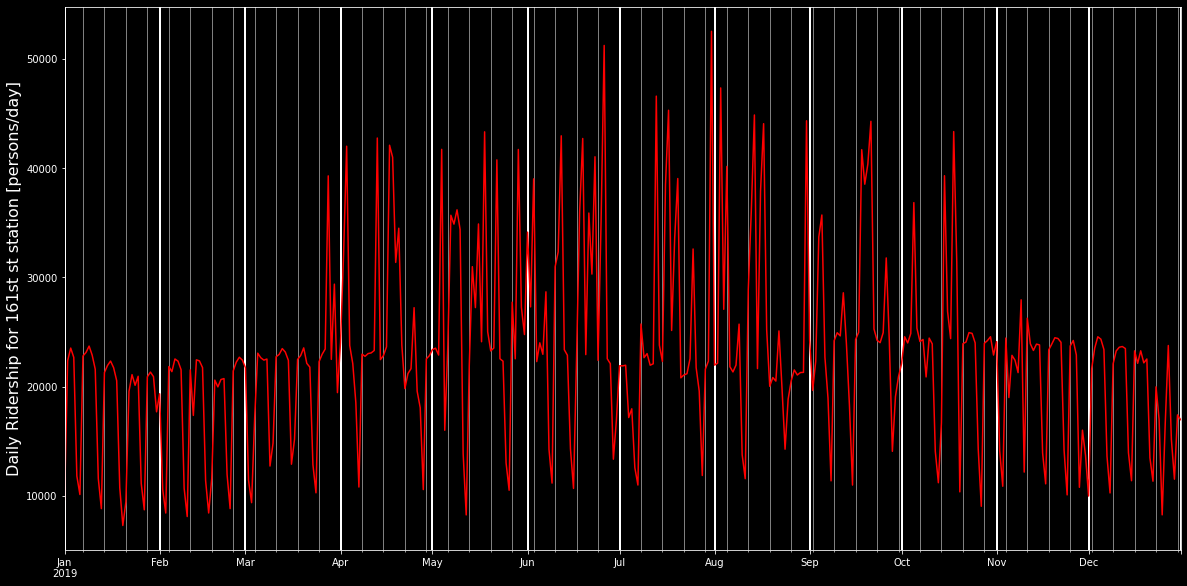

In [ ]:
# -- plot the the short time scale (high frequency) behavior
fig, ax = plt.subplots(figsize=(20, 10))
weakestweeklyACFstation.plot(y='161 St - Yankee Stadium', x='date', legend=False, color='red', ax=ax)
ax.grid(axis="x", which='major', lw=2) # to set the grid lines on either the major ticks or the minor tick marks using which method
ax.grid(axis="x", which='minor', lw=0.5) 

ax.set_xlabel("")
ax.set_ylabel("Daily Ridership for 161st st station [persons/day]", fontsize=16)
fig.show()

**Figure 14** plots the daily time series of ridership for the subway station in NYC with the overall least amount of weekly periodicity as was derived from our earlier analysis above. The station ('161 St - Yankee Stadium') as shown in red has demonstrably abrupt breaks from its trend at various points. For instance, its weekly periodicity remained relatively even between Jan 2019 and March 2019 and then drastically picked up from April to about mid October only to abruptly drop off once more from mid-October through the end of the year. More on this below....

---



**Why does this station have the weakest periodicity?**

161st - Yankee Stadium station has the weekest overall weekly periodicity because its periodicity at lag=7 is not constant throughout the entire range of 2019. There are abrupt changes where weekly periodicity sharply shoots up around April (just in time for BASEBALL season) and stays that way throuhgout baseball season until its end in mid-October and then drops down again sharply -- and therefore becomes rather uncorrelated with its prior values and any weekly periodicity that was present in the series prior to baseball season and once baseball season has concluded. To put it shortly, the impact of Yankees baseball casues alot of volatitlity in ridership in this series during the months of baseball season where ridership becomes elevated and thus the series abrubptly breaks with its past trends once baseball season kicks in -- and once baseball season concludes -- it reverts back to its pre-baseball season levels by and large.  

**For each station, calculate the fractional change between 2019 and 2020 for the number of entries between April 1st and December 1st in each year.**

In [ ]:
mta19.head(3)

,stop_name,daytime_routes,division,line,borough,structure,gtfs_longitude,gtfs_latitude,complex_id,date,entries,exits
0,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2019-01-01,5896.0,5319.0
1,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2019-01-02,14472.0,9702.0
2,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2019-01-03,15674.0,12234.0


In [ ]:
mta19fraction = mta19.columns[[0, 3,4,6,7,9,10,11]]
mta19fraction = mta19[mta19fraction]
mta19fraction.head(3)
mta19fractionlow = mta19fraction["date"] >= "2019-04-01"
mta19fractionhigh = mta19fraction["date"] <= "2019-12-01"
mta19fractiontot = mta19fractionlow & mta19fractionhigh
mta19fraction = mta19fraction[mta19fractiontot]

In [ ]:
mta20fraction = mta20.columns[[0, 3,4,6,7,9,10,11]]
mta20fraction = mta20[mta20fraction]
mta20fraction.head(3)
mta20fractionlow = mta20fraction["date"] >= "2020-04-01"
mta20fractionhigh = mta20fraction["date"] <= "2020-12-01"
mta20fractiontot = mta20fractionlow & mta20fractionhigh
mta20fraction = mta20fraction[mta20fractiontot]


In [ ]:
mta19fraction

,stop_name,line,borough,gtfs_longitude,gtfs_latitude,date,entries,exits
90,Astoria - Ditmars Blvd,Astoria,Q,-73.912034,40.775036,2019-04-01,18680.0,14510.0
91,Astoria - Ditmars Blvd,Astoria,Q,-73.912034,40.775036,2019-04-02,19649.0,17017.0
92,Astoria - Ditmars Blvd,Astoria,Q,-73.912034,40.775036,2019-04-03,20021.0,16859.0
93,Astoria - Ditmars Blvd,Astoria,Q,-73.912034,40.775036,2019-04-04,19824.0,17305.0
94,Astoria - Ditmars Blvd,Astoria,Q,-73.912034,40.775036,2019-04-05,19312.0,16639.0
...,...,...,...,...,...,...,...,...
153754,Lorimer St,Jamaica,Bk,-73.947408,40.703869,2019-11-27,5460.0,4434.0
153755,Lorimer St,Jamaica,Bk,-73.947408,40.703869,2019-11-28,2981.0,2449.0
153756,Lorimer St,Jamaica,Bk,-73.947408,40.703869,2019-11-29,3632.0,2738.0
153757,Lorimer St,Jamaica,Bk,-73.947408,40.703869,2019-11-30,3506.0,2928.0


In [ ]:
mta20fraction

,stop_name,line,borough,gtfs_longitude,gtfs_latitude,date,entries,exits
91,Astoria - Ditmars Blvd,Astoria,Q,-73.912034,40.775036,2020-04-01,1276.0,1446.0
92,Astoria - Ditmars Blvd,Astoria,Q,-73.912034,40.775036,2020-04-02,1188.0,1481.0
93,Astoria - Ditmars Blvd,Astoria,Q,-73.912034,40.775036,2020-04-03,1157.0,1361.0
94,Astoria - Ditmars Blvd,Astoria,Q,-73.912034,40.775036,2020-04-04,666.0,904.0
95,Astoria - Ditmars Blvd,Astoria,Q,-73.912034,40.775036,2020-04-05,563.0,759.0
...,...,...,...,...,...,...,...,...
153268,Lorimer St,Jamaica,Bk,-73.947408,40.703869,2020-11-27,1395.0,1542.0
153269,Lorimer St,Jamaica,Bk,-73.947408,40.703869,2020-11-28,885.0,962.0
153270,Lorimer St,Jamaica,Bk,-73.947408,40.703869,2020-11-29,942.0,994.0
153271,Lorimer St,Jamaica,Bk,-73.947408,40.703869,2020-11-30,1584.0,1507.0


In [ ]:
frames = [mta19fraction, mta20fraction]

In [ ]:
mta1920fraction = pd.concat(frames, axis=1)  

In [ ]:
mta1920fraction

,stop_name,line,borough,gtfs_longitude,gtfs_latitude,date,entries,exits,stop_name,line,borough,gtfs_longitude,gtfs_latitude,date,entries,exits
90,Astoria - Ditmars Blvd,Astoria,Q,-73.912034,40.775036,2019-04-01,18680.0,14510.0,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
91,Astoria - Ditmars Blvd,Astoria,Q,-73.912034,40.775036,2019-04-02,19649.0,17017.0,Astoria - Ditmars Blvd,Astoria,Q,-73.912034,40.775036,2020-04-01,1276.0,1446.0
92,Astoria - Ditmars Blvd,Astoria,Q,-73.912034,40.775036,2019-04-03,20021.0,16859.0,Astoria - Ditmars Blvd,Astoria,Q,-73.912034,40.775036,2020-04-02,1188.0,1481.0
93,Astoria - Ditmars Blvd,Astoria,Q,-73.912034,40.775036,2019-04-04,19824.0,17305.0,Astoria - Ditmars Blvd,Astoria,Q,-73.912034,40.775036,2020-04-03,1157.0,1361.0
94,Astoria - Ditmars Blvd,Astoria,Q,-73.912034,40.775036,2019-04-05,19312.0,16639.0,Astoria - Ditmars Blvd,Astoria,Q,-73.912034,40.775036,2020-04-04,666.0,904.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153754,Lorimer St,Jamaica,Bk,-73.947408,40.703869,2019-11-27,5460.0,4434.0,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
153755,Lorimer St,Jamaica,Bk,-73.947408,40.703869,2019-11-28,2981.0,2449.0,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
153756,Lorimer St,Jamaica,Bk,-73.947408,40.703869,2019-11-29,3632.0,2738.0,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
153757,Lorimer St,Jamaica,Bk,-73.947408,40.703869,2019-11-30,3506.0,2928.0,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN


In [ ]:
mta1920fraction.columns = ['19stop_name', '19line', '19borough', '19longitude', '19latitude', '19date', '19entries', '19exits', '20stop_name', '20line', '20borough', '20longitude', '20latitude', '20date', '20entries', '20exit']

In [ ]:
mta1920fraction

,19stop_name,19line,19borough,19longitude,19latitude,19date,19entries,19exits,20stop_name,20line,20borough,20longitude,20latitude,20date,20entries,20exit
90,Astoria - Ditmars Blvd,Astoria,Q,-73.912034,40.775036,2019-04-01,18680.0,14510.0,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
91,Astoria - Ditmars Blvd,Astoria,Q,-73.912034,40.775036,2019-04-02,19649.0,17017.0,Astoria - Ditmars Blvd,Astoria,Q,-73.912034,40.775036,2020-04-01,1276.0,1446.0
92,Astoria - Ditmars Blvd,Astoria,Q,-73.912034,40.775036,2019-04-03,20021.0,16859.0,Astoria - Ditmars Blvd,Astoria,Q,-73.912034,40.775036,2020-04-02,1188.0,1481.0
93,Astoria - Ditmars Blvd,Astoria,Q,-73.912034,40.775036,2019-04-04,19824.0,17305.0,Astoria - Ditmars Blvd,Astoria,Q,-73.912034,40.775036,2020-04-03,1157.0,1361.0
94,Astoria - Ditmars Blvd,Astoria,Q,-73.912034,40.775036,2019-04-05,19312.0,16639.0,Astoria - Ditmars Blvd,Astoria,Q,-73.912034,40.775036,2020-04-04,666.0,904.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153754,Lorimer St,Jamaica,Bk,-73.947408,40.703869,2019-11-27,5460.0,4434.0,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
153755,Lorimer St,Jamaica,Bk,-73.947408,40.703869,2019-11-28,2981.0,2449.0,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
153756,Lorimer St,Jamaica,Bk,-73.947408,40.703869,2019-11-29,3632.0,2738.0,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
153757,Lorimer St,Jamaica,Bk,-73.947408,40.703869,2019-11-30,3506.0,2928.0,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN


In [ ]:
# -- for 2019 first                               
#mta19fractionlow = mta19fraction["date"] >= "2019-04-01"
#mta19fractionhigh = mta19fraction["date"] <= "2019-12-01"
#mta19fractiontot = mta19fractionlow & mta19fractionhigh
#mta19fraction = mta19fraction[mta19fractiontot]
#mta19fractiongroupby = mta19fraction.groupby(["line", "date"]).sum()
#mta19fractiongroupby = mta19fractiongroupby.unstack('line')
#mta19fractiongroupby

In [ ]:
# -- Now for 2020                                
#mta20fractionlow = mta20fraction["date"] >= "2020-04-01"
#mta20fractionhigh = mta20fraction["date"] <= "2020-12-01"
#mta20fractiontot = mta20fractionlow & mta20fractionhigh
#mta20fraction = mta20fraction[mta20fractiontot]
#mta20fractiongroupby = mta20fraction.groupby(["line", "date"]).sum()
#mta20fractiongroupby = mta20fractiongroupby.unstack('line')
#mta20fractiongroupby


In [ ]:
#mta19fractiongroupbyentries = mta19fractiongroupby['entries']

In [ ]:
#mta20fractiongroupbyentries = mta20fractiongroupby['entries']

In [ ]:
#mta19fractiongroupbyentries

In [ ]:
#mta20fractiongroupbyentries

Calculating the fractional change 

In [ ]:
mta1920fraction

,19stop_name,19line,19borough,19longitude,19latitude,19date,19entries,19exits,20stop_name,20line,20borough,20longitude,20latitude,20date,20entries,20exit
90,Astoria - Ditmars Blvd,Astoria,Q,-73.912034,40.775036,2019-04-01,18680.0,14510.0,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
91,Astoria - Ditmars Blvd,Astoria,Q,-73.912034,40.775036,2019-04-02,19649.0,17017.0,Astoria - Ditmars Blvd,Astoria,Q,-73.912034,40.775036,2020-04-01,1276.0,1446.0
92,Astoria - Ditmars Blvd,Astoria,Q,-73.912034,40.775036,2019-04-03,20021.0,16859.0,Astoria - Ditmars Blvd,Astoria,Q,-73.912034,40.775036,2020-04-02,1188.0,1481.0
93,Astoria - Ditmars Blvd,Astoria,Q,-73.912034,40.775036,2019-04-04,19824.0,17305.0,Astoria - Ditmars Blvd,Astoria,Q,-73.912034,40.775036,2020-04-03,1157.0,1361.0
94,Astoria - Ditmars Blvd,Astoria,Q,-73.912034,40.775036,2019-04-05,19312.0,16639.0,Astoria - Ditmars Blvd,Astoria,Q,-73.912034,40.775036,2020-04-04,666.0,904.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153754,Lorimer St,Jamaica,Bk,-73.947408,40.703869,2019-11-27,5460.0,4434.0,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
153755,Lorimer St,Jamaica,Bk,-73.947408,40.703869,2019-11-28,2981.0,2449.0,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
153756,Lorimer St,Jamaica,Bk,-73.947408,40.703869,2019-11-29,3632.0,2738.0,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
153757,Lorimer St,Jamaica,Bk,-73.947408,40.703869,2019-11-30,3506.0,2928.0,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN


In [ ]:
mta1920fraction

,19stop_name,19line,19borough,19longitude,19latitude,19date,19entries,19exits,20stop_name,20line,20borough,20longitude,20latitude,20date,20entries,20exit
90,Astoria - Ditmars Blvd,Astoria,Q,-73.912034,40.775036,2019-04-01,18680.0,14510.0,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
91,Astoria - Ditmars Blvd,Astoria,Q,-73.912034,40.775036,2019-04-02,19649.0,17017.0,Astoria - Ditmars Blvd,Astoria,Q,-73.912034,40.775036,2020-04-01,1276.0,1446.0
92,Astoria - Ditmars Blvd,Astoria,Q,-73.912034,40.775036,2019-04-03,20021.0,16859.0,Astoria - Ditmars Blvd,Astoria,Q,-73.912034,40.775036,2020-04-02,1188.0,1481.0
93,Astoria - Ditmars Blvd,Astoria,Q,-73.912034,40.775036,2019-04-04,19824.0,17305.0,Astoria - Ditmars Blvd,Astoria,Q,-73.912034,40.775036,2020-04-03,1157.0,1361.0
94,Astoria - Ditmars Blvd,Astoria,Q,-73.912034,40.775036,2019-04-05,19312.0,16639.0,Astoria - Ditmars Blvd,Astoria,Q,-73.912034,40.775036,2020-04-04,666.0,904.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153754,Lorimer St,Jamaica,Bk,-73.947408,40.703869,2019-11-27,5460.0,4434.0,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
153755,Lorimer St,Jamaica,Bk,-73.947408,40.703869,2019-11-28,2981.0,2449.0,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
153756,Lorimer St,Jamaica,Bk,-73.947408,40.703869,2019-11-29,3632.0,2738.0,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
153757,Lorimer St,Jamaica,Bk,-73.947408,40.703869,2019-11-30,3506.0,2928.0,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN


In [ ]:
#fractional_change = mta1920fraction['19entries'] - mta1920fraction['20entries']

In [ ]:
fractional_change = mta1920fraction['20entries'] / mta1920fraction['19entries']

In [ ]:
#fractional_change = fractional_change / mta1920fraction['20entries']

In [ ]:
fractional_change

90             NaN
91        0.064940
92        0.059338
93        0.058364
94        0.034486
            ...   
153754         NaN
153755         NaN
153756         NaN
153757         NaN
153758         NaN
Length: 137212, dtype: float64

In [ ]:
mta1920fraction['fractional_change'] = fractional_change

In [ ]:
mta1920fraction['fractional_change']

90             NaN
91        0.064940
92        0.059338
93        0.058364
94        0.034486
            ...   
153754         NaN
153755         NaN
153756         NaN
153757         NaN
153758         NaN
Name: fractional_change, Length: 137212, dtype: float64

In [ ]:
mta1920fraction

,19stop_name,19line,19borough,19longitude,19latitude,19date,19entries,19exits,20stop_name,20line,20borough,20longitude,20latitude,20date,20entries,20exit,fractional_change
90,Astoria - Ditmars Blvd,Astoria,Q,-73.912034,40.775036,2019-04-01,18680.0,14510.0,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
91,Astoria - Ditmars Blvd,Astoria,Q,-73.912034,40.775036,2019-04-02,19649.0,17017.0,Astoria - Ditmars Blvd,Astoria,Q,-73.912034,40.775036,2020-04-01,1276.0,1446.0,0.064940
92,Astoria - Ditmars Blvd,Astoria,Q,-73.912034,40.775036,2019-04-03,20021.0,16859.0,Astoria - Ditmars Blvd,Astoria,Q,-73.912034,40.775036,2020-04-02,1188.0,1481.0,0.059338
93,Astoria - Ditmars Blvd,Astoria,Q,-73.912034,40.775036,2019-04-04,19824.0,17305.0,Astoria - Ditmars Blvd,Astoria,Q,-73.912034,40.775036,2020-04-03,1157.0,1361.0,0.058364
94,Astoria - Ditmars Blvd,Astoria,Q,-73.912034,40.775036,2019-04-05,19312.0,16639.0,Astoria - Ditmars Blvd,Astoria,Q,-73.912034,40.775036,2020-04-04,666.0,904.0,0.034486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153754,Lorimer St,Jamaica,Bk,-73.947408,40.703869,2019-11-27,5460.0,4434.0,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
153755,Lorimer St,Jamaica,Bk,-73.947408,40.703869,2019-11-28,2981.0,2449.0,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
153756,Lorimer St,Jamaica,Bk,-73.947408,40.703869,2019-11-29,3632.0,2738.0,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
153757,Lorimer St,Jamaica,Bk,-73.947408,40.703869,2019-11-30,3506.0,2928.0,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN


In [ ]:
mta1920fraction.dtypes

19stop_name                  object
19line                       object
19borough                    object
19longitude                 float64
19latitude                  float64
19date               datetime64[ns]
19entries                   float64
19exits                     float64
20stop_name                  object
20line                       object
20borough                    object
20longitude                 float64
20latitude                  float64
20date               datetime64[ns]
20entries                   float64
20exit                      float64
fractional_change           float64
dtype: object

In [ ]:
#mta1920fractiongroupby = mta1920fraction.groupby=(['fractional_change', ])

In [ ]:
#mta1920fractiongroupby

In [ ]:
mta1920fraction = mta1920fraction.dropna()

In [ ]:
mta1920fraction

,19stop_name,19line,19borough,19longitude,19latitude,19date,19entries,19exits,20stop_name,20line,20borough,20longitude,20latitude,20date,20entries,20exit,fractional_change
91,Astoria - Ditmars Blvd,Astoria,Q,-73.912034,40.775036,2019-04-02,19649.0,17017.0,Astoria - Ditmars Blvd,Astoria,Q,-73.912034,40.775036,2020-04-01,1276.0,1446.0,0.064940
92,Astoria - Ditmars Blvd,Astoria,Q,-73.912034,40.775036,2019-04-03,20021.0,16859.0,Astoria - Ditmars Blvd,Astoria,Q,-73.912034,40.775036,2020-04-02,1188.0,1481.0,0.059338
93,Astoria - Ditmars Blvd,Astoria,Q,-73.912034,40.775036,2019-04-04,19824.0,17305.0,Astoria - Ditmars Blvd,Astoria,Q,-73.912034,40.775036,2020-04-03,1157.0,1361.0,0.058364
94,Astoria - Ditmars Blvd,Astoria,Q,-73.912034,40.775036,2019-04-05,19312.0,16639.0,Astoria - Ditmars Blvd,Astoria,Q,-73.912034,40.775036,2020-04-04,666.0,904.0,0.034486
95,Astoria - Ditmars Blvd,Astoria,Q,-73.912034,40.775036,2019-04-06,1124.0,4274.0,Astoria - Ditmars Blvd,Astoria,Q,-73.912034,40.775036,2020-04-05,563.0,759.0,0.500890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153268,Flushing Av,Jamaica,Bk,-73.941126,40.700260,2019-07-29,8532.0,5235.0,Lorimer St,Jamaica,Bk,-73.947408,40.703869,2020-11-27,1395.0,1542.0,0.163502
153269,Flushing Av,Jamaica,Bk,-73.941126,40.700260,2019-07-30,8605.0,5067.0,Lorimer St,Jamaica,Bk,-73.947408,40.703869,2020-11-28,885.0,962.0,0.102847
153270,Flushing Av,Jamaica,Bk,-73.941126,40.700260,2019-07-31,8658.0,5177.0,Lorimer St,Jamaica,Bk,-73.947408,40.703869,2020-11-29,942.0,994.0,0.108801
153271,Flushing Av,Jamaica,Bk,-73.941126,40.700260,2019-08-01,9145.0,5442.0,Lorimer St,Jamaica,Bk,-73.947408,40.703869,2020-11-30,1584.0,1507.0,0.173209


In [ ]:
#mta1920fractiongroupby

In [ ]:
#mta1920fractiongroupby = mta1920fraction.groupby(['19line', '19longitude', '19latitude']).sum().first()
mta1920fractiongroupby = mta1920fraction.groupby(['19stop_name']).first()




In [ ]:
mta1920fractiongroupby = mta1920fractiongroupby.reset_index()

In [ ]:
mta1920fractiongroupby

,19stop_name,19line,19borough,19longitude,19latitude,19date,19entries,19exits,20stop_name,20line,20borough,20longitude,20latitude,20date,20entries,20exit,fractional_change
0,1 Av,Canarsie,M,-73.981628,40.730953,2019-04-01,19144.0,20956.0,3 Av,Canarsie,M,-73.986122,40.732849,2020-05-23,353.0,431.0,0.018439
1,103 St,8th Av - Fulton St,M,-73.961454,40.796092,2019-04-01,4685.0,3072.0,Cathedral Pkwy (110 St),8th Av - Fulton St,M,-73.958161,40.800603,2020-10-12,1649.0,1231.0,0.351974
2,103 St - Corona Plaza,Flushing,Q,-73.862700,40.749865,2019-04-01,20173.0,14079.0,Junction Blvd,Flushing,Q,-73.869527,40.749145,2020-08-26,9726.0,12180.0,0.482130
3,104 St,Liberty Av,Q,-73.837683,40.681711,2019-04-20,776.0,264.0,104 St,Liberty Av,Q,-73.837683,40.681711,2020-04-01,238.0,95.0,0.306701
4,110 St,Lexington Av,M,-73.944250,40.795020,2019-06-17,10138.0,8899.0,103 St,Lexington Av,M,-73.947478,40.790600,2020-04-01,2387.0,2854.0,0.235451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,Woodhaven Blvd,Queens Blvd,Q,-73.869229,40.733106,2019-04-01,20084.0,10170.0,63 Dr - Rego Park,Queens Blvd,Q,-73.861604,40.729846,2020-04-26,589.0,374.0,0.029327
334,Woodlawn,Jerome Av,Bx,-73.878751,40.886037,2019-04-01,7009.0,1281.0,Woodlawn,Jerome Av,Bx,-73.878751,40.886037,2020-10-22,3240.0,1385.0,0.462263
335,Woodside - 61 St,Flushing,Q,-73.902984,40.745630,2019-04-01,17022.0,17573.0,52 St,Flushing,Q,-73.912549,40.744149,2020-09-20,1074.0,1212.0,0.063095
336,York St,6th Av - Culver,Bk,-73.986751,40.701397,2019-07-23,12091.0,6022.0,East Broadway,6th Av - Culver,M,-73.990173,40.713715,2020-04-01,1444.0,1175.0,0.119428


In [ ]:
print(mta1920fractiongroupby["fractional_change"])

0      0.018439
1      0.351974
2      0.482130
3      0.306701
4      0.235451
         ...   
333    0.029327
334    0.462263
335    0.063095
336    0.119428
337    0.295276
Name: fractional_change, Length: 338, dtype: float64


In [ ]:
mta1920fractiongroupby[["19latitude", "19longitude", "fractional_change"]]

,19latitude,19longitude,fractional_change
0,40.730953,-73.981628,0.018439
1,40.796092,-73.961454,0.351974
2,40.749865,-73.862700,0.482130
3,40.681711,-73.837683,0.306701
4,40.795020,-73.944250,0.235451
...,...,...,...
333,40.733106,-73.869229,0.029327
334,40.886037,-73.878751,0.462263
335,40.745630,-73.902984,0.063095
336,40.701397,-73.986751,0.119428


**Make a scatter plot of the station lon/lat where the size of the marker scales with the fractional change above using `folium` (see `dstep21/week4/09.21.2021/dstep21_delaware_natural_areas.ipynb`).**

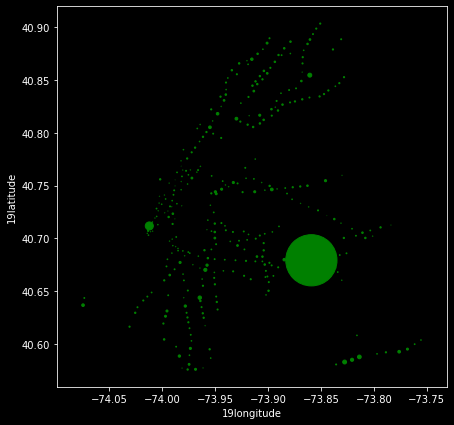

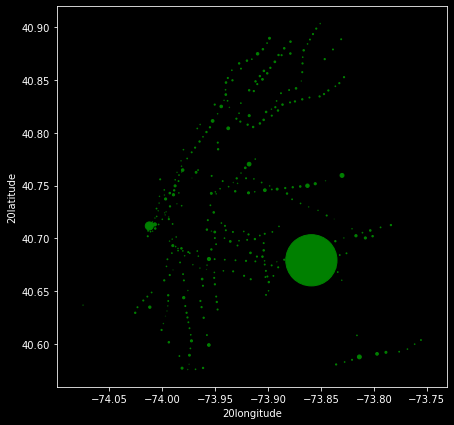

In [ ]:

fig, ax = plt.subplots(figsize=(7, 7))

mta1920fractiongroupby.plot.scatter("19longitude", "19latitude", color="green", s=mta1920fractiongroupby["fractional_change"] *5, ax=ax)
ax.axis("equal") # set the aspect ratio of the axes to be equal
fig.show()


fig, ax = plt.subplots(figsize=(7, 7))

mta1920fractiongroupby.plot.scatter("20longitude", "20latitude", color="green", s=mta1920fractiongroupby["fractional_change"] *5, ax=ax)
ax.axis("equal") # set the aspect ratio of the axes to be equal
fig.show()


Figure 15 -- test plot -- NOT RELEVANT FOR THIS ANALYSIS (FOR PRACTICE)

In [ ]:
import folium

In [ ]:
# -- create a map
mymap = folium.Map(location=[40.67, -73.98], zoom_start=8, width=1200)

# -- add each Natural area to the map, one by one
ndata = len(mta1920fractiongroupby)
for ii in range(ndata):

  lat  = mta1920fractiongroupby["19latitude"].iloc[ii]
  lon  = mta1920fractiongroupby["19longitude"].iloc[ii]
  rad  = mta1920fractiongroupby["fractional_change"].iloc[ii] * 100.
  name = mta1920fractiongroupby["19stop_name"].iloc[ii]

  circ = folium.Circle(location=[lat, lon], radius=rad, popup=name, fill=True, color="red")
  circ.add_to(mymap)

mymap

**Figure 16** above plots the fractional change in NYC ridership between 2019 and 2020 where the points with the larger circles in red represent the subway stations that experienced the greatest change in overall ridership numbers between the 2 years (helping us to visualize the impacts of the pandemic on ridership between 2019 (no pandemic) and 2020 (pandemic). Overall -- figure 16 shows us that the various stations in the heart of Manhattan (the business district) where Wall street, the WTC, and other entities lie -- experienced the greatest change in ridership numbers between the two years as is evident by the greatly enhanced size of the red circle. 

**Comment on the implications for the scatter plot above.**

Overall, our scatterplot demonstrates that one thing is salient nonetheless -- the pandemic had greatly impacted different areas of NYC ridership in New York City -- disproportionately. Whereas the interactive map is largest points are over manhattan which shows that the fractional change from 2019 to 2020 as a result of the pandemic disproportioantely impacted ridership for the manhattan district in its entirety relative to all other districts. This graph speaks to what we knew to be the socioeconomic problems of the pandemic... the business class of manhattan could adapt to the work from home luxuries while the rest of us were not afforded such priveleges... 
